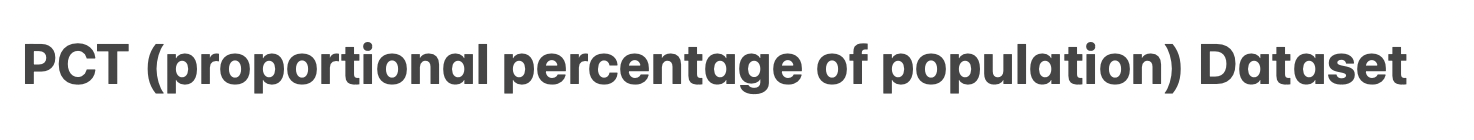

# BASE MODELS - GOTTA TRY 'EM ALL

In [34]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [163]:
import warnings
warnings.filterwarnings('once')

In [171]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')
prf_df = pd.read_csv('data/Full_Dataset_PRF.csv')

In [167]:
# Function to calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df.iloc[:, 3:454]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)])

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LassoCV())])

# Specify the hyperparameters and classifiers for the grid search
from sklearn.linear_model import RidgeCV

param_grid = [
    {'classifier': [LassoCV(max_iter=1000)],
     'classifier__cv': [3, 5, 10],
     'classifier__selection': ['random', 'cyclic']},
    {'classifier': [RidgeCV()],
     'classifier__cv': [3, 5, 10]}
]

# Initialize the grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the test set
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Compute R-squared for the training set
y_train_pred = best_estimator.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training R-squared: {r2_train:.3f}")
print(f"Test R-squared: {r2_test:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Absolute Percentage Error: {mape:.3f}%")

# Get the feature importances
importances = best_estimator.named_steps['classifier'].coef_

# Map the features to their coefficients (importances)
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort by most to least important
feature_importances = feature_importances.sort_values("Importance", ascending=False)

# display the DataFrame
print(feature_importances)


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.931e+00, tolerance: 5.972e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.648e+00, tolerance: 5.997e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu

Best parameters: {'classifier': LassoCV(cv=5), 'classifier__cv': 5, 'classifier__selection': 'cyclic'}
Best score: 0.9284685014060239
Training R-squared: 0.968
Test R-squared: 0.887
Mean Squared Error: 24.592
Root Mean Squared Error: 4.959
Mean Absolute Error: 3.930
Mean Absolute Percentage Error: 173.114%
                                               Feature  Importance
329               COMMUTING TO WORK - Worked from home    2.809903
15         RACE - One race - Black or African American    2.789235
5                HISPANIC OR LATINO AND RACE - Mexican    1.930495
220  EDUCATIONAL ATTAINMENT - Population 25 years a...    1.578787
209                                   ANCESTRY - Swiss    1.203714
..                                                 ...         ...
181          YEAR STRUCTURE BUILT - Built 1980 to 1989   -1.121636
432  INDUSTRY - Agriculture, forestry, fishing and ...   -1.300757
308        Total households - Married-couple household   -1.493631
224  EDUCATIONAL ATTAI

In [47]:
# Define the preprocessors (scalers)
classifiers = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'RidgeCV': {
        'model': RidgeCV(cv=5),
        'params': {}
    },
    'LassoCV': {
        'model': LassoCV(cv=5),
        'params': {
        'classifier__cv': [3, 5, 10]}
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__epsilon': [0.1, 0.2, 0.3]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'classifier__alpha': [0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    }
}


preprocessors = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'No Scaler': None
}

# Iterate over each preprocessor
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=42)

        # Fit the randomized search
        random_search.fit(X_train, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")
        

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.657448287785707
R-squared: -0.147
Mean Squared Error: 248.924
Root Mean Squared Error: 15.777
Mean Absolute Error: 11.957
Mean Absolute Percentage Error: 460.338%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.8980197557666884
R-squared: 0.909
Mean Squared Error: 19.801
Root Mean Squared Error: 4.450
Mean Absolute Error: 3.543
Mean Absolute Percentage Error: 134.089%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.931e+00, tolerance: 5.972e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.648e+00, 


Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.9284685014060239
R-squared: 0.887
Mean Squared Error: 24.592
Root Mean Squared Error: 4.959
Mean Absolute Error: 3.930
Mean Absolute Percentage Error: 173.114%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.8384325367504875
R-squared: 0.868
Mean Squared Error: 28.672
Root Mean Squared Error: 5.355
Mean Absolute Error: 4.126
Mean Absolute Percentage Error: 169.963%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.8735203095026927
R-squared: 0.878
Mean Squared Error: 26.375
Root Mean Squared Error: 5.136
Mean Absolute Error: 3.861
Mean Absolute Percentage Error: 193.323%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.8522642434117442
R-squared: 0.874
Mean Squared Error: 27.439
Root Mean Squared Error: 5.238
Mean Absolute Error: 3.896
Mean Absolute Percentage Error: 126.683%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.608e+02, tolerance: 7.956e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.643e+02, 


Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.9278700443633177
R-squared: 0.891
Mean Squared Error: 23.629
Root Mean Squared Error: 4.861
Mean Absolute Error: 3.814
Mean Absolute Percentage Error: 170.193%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.7077350172383281
R-squared: 0.697
Mean Squared Error: 65.742
Root Mean Squared Error: 8.108
Mean Absolute Error: 6.540
Mean Absolute Percentage Error: 323.853%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 3}
Best score: 0.7790870482492477
R-squared: 0.820
Mean Squared Error: 39.110
Root Mean Squared Error: 6.254
Mean Absolute Error: 4.634
Mean Absolute Percentage Error: 142.855%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.8265183715147595
R-squared: 0.823
Mean Squared Error: 38.342
Root Mean Squared Error: 6.192
Mean Absolute Error: 4.967
Mean Absolute Percentage Error: 182.557%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.8781702915261128
R-squared: 0.873
Mean Squared Error: 27.657
Root Mean Squared Error: 5.259
Mean Absolute Error: 4.194
Mean Absolute Percentage Error: 178.177%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.6547348929154091
R-squared: -0.189
Mean Squared Error: 258.061
Root Mean Squared Error: 16.064
Mean Absolute Error: 12.266
Mean Absolute Percentage Error: 493.077%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9165698796985154
R-squared: 0.912
Mean Squared Error: 19.057
Root Mean Squared Error: 4.365
Mean Absolute Error: 3.266
Mean Absolute Percentage Error: 166.148%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.443e+00, tolerance: 6.272e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.252e+00, 


Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.9290962613084508
R-squared: 0.888
Mean Squared Error: 24.243
Root Mean Squared Error: 4.924
Mean Absolute Error: 3.828
Mean Absolute Percentage Error: 193.308%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.8406625665345763
R-squared: 0.873
Mean Squared Error: 27.496
Root Mean Squared Error: 5.244
Mean Absolute Error: 4.052
Mean Absolute Percentage Error: 169.415%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.8744798913282864
R-squared: 0.876
Mean Squared Error: 26.818
Root Mean Squared Error: 5.179
Mean Absolute Error: 3.931
Mean Absolute Percentage Error: 195.609%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.8837610549577309
R-squared: 0.901
Mean Squared Error: 21.543
Root Mean Squared Error: 4.641
Mean Absolute Error: 3.419
Mean Absolute Percentage Error: 156.658%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.8854377475784692
R-squared: 0.852
Mean Squared Error: 32.161
Root Mean Squared Error: 5.671
Mean Absolute Error: 4.515
Mean Absolute Percentage Error: 222.528%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.6911451821650715
R-squared: 0.719
Mean Squared Error: 60.976
Root Mean Squared Error: 7.809
Mean Absolute Error: 6.392
Mean Absolute Percentage Error: 325.173%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 3}
Best score: 0.7985037674318634
R-squared: 0.846
Mean Squared Error: 33.342
Root Mean Squared Error: 5.774
Mean Absolute Error: 4.347
Mean Absolute Percentage Error: 127.483%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.8305035465950791
R-squared: 0.840
Mean Squared Error: 34.790
Root Mean Squared Error: 5.898
Mean Absolute Error: 4.678
Mean Absolute Percentage Error: 175.947%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.8821808145099631
R-squared: 0.868
Mean Squared Error: 28.701
Root Mean Squared Error: 5.357
Mean Absolute Error: 4.293
Mean Absolute Percentage Error: 197.768%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.6361250134982113
R-squared: -0.220
Mean Squared Error: 264.785
Root Mean Squared Error: 16.272
Mean Absolute Error: 11.059
Mean Absolute Percentage Error: 372.332%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.8123825495579483
R-squared: 0.804
Mean Squared Error: 42.520
Root Mean Squared Error: 6.521
Mean Absolute Error: 5.013
Mean Absolute Percentage Error: 126.047%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.801e+02, tolerance: 7.956e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.128e+00, 

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.131e+00, tolerance: 5.960e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.127e+00, tolerance: 5.960e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+01, tolerance: 7.027e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+01, tolerance: 7.027e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.780e+00, tolerance: 6.779e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.262e+00, tolerance: 6.779e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+01, tolerance: 7.201e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+01, tolerance: 6.799e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu


No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.7798682376819475
R-squared: 0.806
Mean Squared Error: 42.036
Root Mean Squared Error: 6.483
Mean Absolute Error: 5.032
Mean Absolute Percentage Error: 202.115%

No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.8420410418115599
R-squared: 0.869
Mean Squared Error: 28.496
Root Mean Squared Error: 5.338
Mean Absolute Error: 4.047
Mean Absolute Percentage Error: 173.776%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.8735639571540498
R-squared: 0.878
Mean Squared Error: 26.373
Root Mean Squared Error: 5.135
Mean Absolute Error: 3.869
Mean Absolute Percentage Error: 194.903%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.2, 'classifier__C': 10}
Best score: 0.4080153674745658
R-squared: 0.587
Mean Squared Error: 89.613
Root Mean Squared Error: 9.466
Mean Absolute Error: 7.747
Mean Absolute Percentage Error: 229.645%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.549e+02, tolerance: 7.956e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.848e+02, 

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.217e+03, tolerance: 7.910e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+03, tolerance: 7.680e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.714e+03, tolerance: 7.785e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+03, tolerance: 9.707e+00
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iteratio


No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.1, 'classifier__alpha': 1}
Best score: 0.9091505764335622
R-squared: 0.896
Mean Squared Error: 22.557
Root Mean Squared Error: 4.749
Mean Absolute Error: 3.803
Mean Absolute Percentage Error: 134.647%

No Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.6948246224258487
R-squared: 0.729
Mean Squared Error: 58.895
Root Mean Squared Error: 7.674
Mean Absolute Error: 6.319
Mean Absolute Percentage Error: 324.575%

No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.6091150366681966
R-squared: 0.711
Mean Squared Error: 62.785
Root Mean Squared Error: 7.924
Mean Absolute Error: 6.263
Mean Absolute Percentage Error: 250.972%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.8341126688472466
R-squared: 0.834
Mean Squared Error: 36.002
Root Mean Squared Error: 6.000
Mean Absolute Error: 4.793
Mean Absolute Percentage Error: 197.476%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.8789404014728361
R-squared: 0.869
Mean Squared Error: 28.378
Root Mean Squared Error: 5.327
Mean Absolute Error: 4.210
Mean Absolute Percentage Error: 188.969%


# ^^^^^^^^^Here^^^^^^^^^^

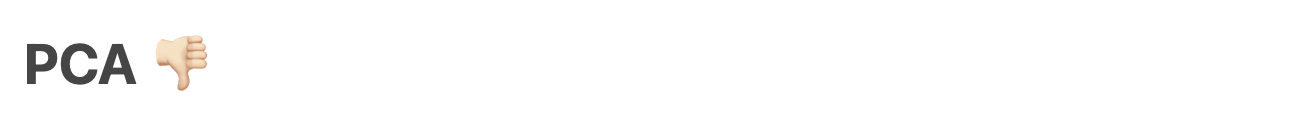

In [60]:
from sklearn.decomposition import PCA

# instantiate
pca = PCA(n_components=0.99)

# Fit PCA on your training data and transform it
X_train_pca99 = pca.fit_transform(X_train)

# Transform the test data using the already fitted PCA object
X_test_pca99 = pca.transform(X_test)

print("Number of components chosen by PCA: ", pca.n_components_)


Number of components chosen by PCA:  10


In [61]:
# Define the preprocessors (scalers)
classifiers = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'RidgeCV': {
        'model': RidgeCV(cv=5),
        'params': {}
    },
    'LassoCV': {
        'model': LassoCV(cv=5),
        'params': {
        'classifier__cv': [3, 5, 10]}
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__epsilon': [0.1, 0.2, 0.3]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'classifier__alpha': [0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    }
}


preprocessors = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'No Scaler': None
}

# Iterate over each preprocessor
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=42)

        # Fit the randomized search
        random_search.fit(X_train_pca99, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test_pca99)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")
        

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.6508582554285599
R-squared: 0.722
Mean Squared Error: 60.275
Root Mean Squared Error: 7.764
Mean Absolute Error: 6.299
Mean Absolute Percentage Error: 284.806%

Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.6537665916471171
R-squared: 0.727
Mean Squared Error: 59.261
Root Mean Squared Error: 7.698
Mean Absolute Error: 6.276
Mean Absolute Percentage Error: 277.753%

Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.6544490739141509
R-squared: 0.733
Mean Squared Error: 58.012
Root Mean Squared Error: 7.617
Mean Absolute Error: 6.245
Mean Absolute Percentage Error: 246.534%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.6724878029073238
R-squared: 0.776
Mean Squared Error: 48.526
Root Mean Squared Error: 6.966
Mean Absolute Error: 5.588
Mean Absolute Percentage Error: 230.149%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.6797824664105578
R-squared: 0.780
Mean Squared Error: 47.832
Root Mean Squared Error: 6.916
Mean Absolute Error: 5.348
Mean Absolute Percentage Error: 260.315%

Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.7028867276893341
R-squared: 0.728
Mean Squared Error: 59.020
Root Mean Squared Error: 7.682
Mean Absolute Error: 6.004
Mean Absolute Percentage Error: 199.758%

Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier__

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.42743377204884814
R-squared: 0.464
Mean Squared Error: 116.311
Root Mean Squared Error: 10.785
Mean Absolute Error: 7.996
Mean Absolute Percentage Error: 404.520%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.6651478279680436
R-squared: 0.686
Mean Squared Error: 68.241
Root Mean Squared Error: 8.261
Mean Absolute Error: 6.541
Mean Absolute Percentage Error: 235.284%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.6196473969854777
R-squared: 0.688
Mean Squared Error: 67.822
Root Mean Squared Error: 8.235
Mean Absolute Error: 6.882
Mean Absolute Percentage Error: 231.509%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.7151793872562768
R-squared: 0.780
Mean Squared Error: 47.857
Root Mean Squared Error: 6.918
Mean Absolute Error: 5.386
Mean Absolute Percentage Error: 205.750%

Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.6508582554285599
R-squared: 0.722
Mean Squared Error: 60.275
Root Mean Squared Error: 7.764
Mean Absolute Error: 6.299
Mean Absolute Percentage Error: 284.806%

Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.6519935527531681
R-squared: 0.724
Mean Squared Error: 59.843
Root Mean Squared Error: 7.736
Mean Absolute Error: 6.289
Mean Absolute Percentage Error: 281.081%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.6557599544900915
R-squared: 0.731
Mean Squared Error: 58.469
Root Mean Squared Error: 7.646
Mean Absolute Error: 6.255
Mean Absolute Percentage Error: 249.164%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.6715618716745835
R-squared: 0.777
Mean Squared Error: 48.376
Root Mean Squared Error: 6.955
Mean Absolute Error: 5.583
Mean Absolute Percentage Error: 230.354%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.6803575250972764
R-squared: 0.779
Mean Squared Error: 47.974
Root Mean Squared Error: 6.926
Mean Absolute Error: 5.373
Mean Absolute Percentage Error: 259.597%

Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.7231077821007215
R-squared: 0.769
Mean Squared Error: 50.169
Root Mean Squared Error: 7.083
Mean Absolute Error: 5.627
Mean Absolute Percentage Error: 186.354%

Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_r

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.4267092387213614
R-squared: 0.471
Mean Squared Error: 114.872
Root Mean Squared Error: 10.718
Mean Absolute Error: 7.984
Mean Absolute Percentage Error: 404.987%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 5}
Best score: 0.6726464403712347
R-squared: 0.693
Mean Squared Error: 66.701
Root Mean Squared Error: 8.167
Mean Absolute Error: 6.436
Mean Absolute Percentage Error: 232.409%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.6331560126794954
R-squared: 0.700
Mean Squared Error: 65.050
Root Mean Squared Error: 8.065
Mean Absolute Error: 6.759
Mean Absolute Percentage Error: 210.208%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.7111217876039941
R-squared: 0.781
Mean Squared Error: 47.470
Root Mean Squared Error: 6.890
Mean Absolute Error: 5.434
Mean Absolute Percentage Error: 225.396%

No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.6508582554285599
R-squared: 0.722
Mean Squared Error: 60.275
Root Mean Squared Error: 7.764
Mean Absolute Error: 6.299
Mean Absolute Percentage Error: 284.806%

No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.6508582554324713
R-squared: 0.722
Mean Squared Error: 60.275
Root Mean Squared Error: 7.764
Mean Absolute Error: 6.299
Mean Absolute Percentage Error: 284.806%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.6601452748235219
R-squared: 0.733
Mean Squared Error: 57.972
Root Mean Squared Error: 7.614
Mean Absolute Error: 6.198
Mean Absolute Percentage Error: 273.388%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.6684961418672983
R-squared: 0.765
Mean Squared Error: 51.102
Root Mean Squared Error: 7.149
Mean Absolute Error: 5.707
Mean Absolute Percentage Error: 233.945%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.6803992551211369
R-squared: 0.785
Mean Squared Error: 46.752
Root Mean Squared Error: 6.838
Mean Absolute Error: 5.285
Mean Absolute Percentage Error: 229.004%

No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.6917254000142904
R-squared: 0.795
Mean Squared Error: 44.470
Root Mean Squared Error: 6.669
Mean Absolute Error: 5.329
Mean Absolute Percentage Error: 203.847%

No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'class

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters


No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.6047647420659138
R-squared: 0.699
Mean Squared Error: 65.313
Root Mean Squared Error: 8.082
Mean Absolute Error: 6.314
Mean Absolute Percentage Error: 249.248%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.6306584119460268
R-squared: 0.681
Mean Squared Error: 69.258
Root Mean Squared Error: 8.322
Mean Absolute Error: 6.981
Mean Absolute Percentage Error: 224.817%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.7109517288823121
R-squared: 0.775
Mean Squared Error: 48.806
Root Mean Squared Error: 6.986
Mean Absolute Error: 5.585
Mean Absolute Percentage Error: 199.731%


In [62]:
# instantiate
pca = PCA(n_components=0.9999)

# Fit PCA on your training data and transform it
X_train_pca9999 = pca.fit_transform(X_train)

# Transform the test data using the already fitted PCA object
X_test_pca9999 = pca.transform(X_test)

print("Number of components chosen by PCA: ", pca.n_components_)


Number of components chosen by PCA:  32


In [63]:
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=42)

        # Fit the randomized search
        random_search.fit(X_train_pca9999, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test_pca9999)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.7726583974009194
R-squared: 0.793
Mean Squared Error: 45.023
Root Mean Squared Error: 6.710
Mean Absolute Error: 5.274
Mean Absolute Percentage Error: 184.258%

Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.7774285781254713
R-squared: 0.800
Mean Squared Error: 43.460
Root Mean Squared Error: 6.592
Mean Absolute Error: 5.146
Mean Absolute Percentage Error: 179.112%

Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.7808964525341292
R-squared: 0.812
Mean Squared Error: 40.713
Root Mean Squared Error: 6.381
Mean Absolute Error: 5.011
Mean Absolute Percentage Error: 160.649%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.6690995709954608
R-squared: 0.784
Mean Squared Error: 46.873
Root Mean Squared Error: 6.846
Mean Absolute Error: 5.518
Mean Absolute Percentage Error: 205.263%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.7315842134798489
R-squared: 0.805
Mean Squared Error: 42.428
Root Mean Squared Error: 6.514
Mean Absolute Error: 5.269
Mean Absolute Percentage Error: 202.726%

Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.6859946566834043
R-squared: 0.701
Mean Squared Error: 64.955
Root Mean Squared Error: 8.059
Mean Absolute Error: 6.224
Mean Absolute Percentage Error: 186.259%

Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.4110029326661143
R-squared: 0.454
Mean Squared Error: 118.476
Root Mean Squared Error: 10.885
Mean Absolute Error: 8.346
Mean Absolute Percentage Error: 446.145%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 3}
Best score: 0.4817213109322359
R-squared: 0.506
Mean Squared Error: 107.230
Root Mean Squared Error: 10.355
Mean Absolute Error: 8.003
Mean Absolute Percentage Error: 248.533%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.625468796343562
R-squared: 0.700
Mean Squared Error: 65.048
Root Mean Squared Error: 8.065
Mean Absolute Error: 6.920
Mean Absolute Percentage Error: 190.335%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.7043962594963882
R-squared: 0.783
Mean Squared Error: 47.129
Root Mean Squared Error: 6.865
Mean Absolute Error: 5.453
Mean Absolute Percentage Error: 205.726%

Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.7726583974009196
R-squared: 0.793
Mean Squared Error: 45.023
Root Mean Squared Error: 6.710
Mean Absolute Error: 5.274
Mean Absolute Percentage Error: 184.258%

Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.774998568758384
R-squared: 0.796
Mean Squared Error: 44.176
Root Mean Squared Error: 6.646
Mean Absolute Error: 5.212
Mean Absolute Percentage Error: 182.777%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 5}
Best score: 0.7803411559227598
R-squared: 0.811
Mean Squared Error: 40.919
Root Mean Squared Error: 6.397
Mean Absolute Error: 5.049
Mean Absolute Percentage Error: 166.617%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.6800910274133041
R-squared: 0.769
Mean Squared Error: 50.223
Root Mean Squared Error: 7.087
Mean Absolute Error: 5.735
Mean Absolute Percentage Error: 196.682%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.7312139350616809
R-squared: 0.810
Mean Squared Error: 41.276
Root Mean Squared Error: 6.425
Mean Absolute Error: 5.213
Mean Absolute Percentage Error: 196.521%

Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.7141246788879478
R-squared: 0.726
Mean Squared Error: 59.408
Root Mean Squared Error: 7.708
Mean Absolute Error: 6.009
Mean Absolute Percentage Error: 208.398%

Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.3611160364233744
R-squared: 0.416
Mean Squared Error: 126.809
Root Mean Squared Error: 11.261
Mean Absolute Error: 8.541
Mean Absolute Percentage Error: 446.584%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 3}
Best score: 0.4586920285304468
R-squared: 0.578
Mean Squared Error: 91.621
Root Mean Squared Error: 9.572
Mean Absolute Error: 7.577
Mean Absolute Percentage Error: 314.684%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.6259764652265701
R-squared: 0.699
Mean Squared Error: 65.319
Root Mean Squared Error: 8.082
Mean Absolute Error: 6.869
Mean Absolute Percentage Error: 188.261%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.707173247471407
R-squared: 0.786
Mean Squared Error: 46.489
Root Mean Squared Error: 6.818
Mean Absolute Error: 5.465
Mean Absolute Percentage Error: 203.776%

No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.7726583974009185
R-squared: 0.793
Mean Squared Error: 45.023
Root Mean Squared Error: 6.710
Mean Absolute Error: 5.274
Mean Absolute Percentage Error: 184.258%

No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.7726583978055166
R-squared: 0.793
Mean Squared Error: 45.023
Root Mean Squared Error: 6.710
Mean Absolute Error: 5.274
Mean Absolute Percentage Error: 184.258%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.7763131200430518
R-squared: 0.809
Mean Squared Error: 41.503
Root Mean Squared Error: 6.442
Mean Absolute Error: 5.036
Mean Absolute Percentage Error: 201.514%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.669549657581326
R-squared: 0.789
Mean Squared Error: 45.792
Root Mean Squared Error: 6.767
Mean Absolute Error: 5.558
Mean Absolute Percentage Error: 201.131%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.7297621418375011
R-squared: 0.812
Mean Squared Error: 40.902
Root Mean Squared Error: 6.395
Mean Absolute Error: 5.139
Mean Absolute Percentage Error: 196.012%

No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.7052675810172253
R-squared: 0.808
Mean Squared Error: 41.721
Root Mean Squared Error: 6.459
Mean Absolute Error: 5.169
Mean Absolute Percentage Error: 203.522%

No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classi

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.40810450988011643
R-squared: 0.494
Mean Squared Error: 109.833
Root Mean Squared Error: 10.480
Mean Absolute Error: 8.137
Mean Absolute Percentage Error: 443.540%

No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.6091150366681966
R-squared: 0.711
Mean Squared Error: 62.785
Root Mean Squared Error: 7.924
Mean Absolute Error: 6.263
Mean Absolute Percentage Error: 250.972%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.6286842433044376
R-squared: 0.708
Mean Squared Error: 63.462
Root Mean Squared Error: 7.966
Mean Absolute Error: 6.849
Mean Absolute Percentage Error: 197.328%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.7030760501489238
R-squared: 0.768
Mean Squared Error: 50.296
Root Mean Squared Error: 7.092
Mean Absolute Error: 5.623
Mean Absolute Percentage Error: 191.166%


# Neural Network

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)

train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

print('Train R^2:', train_r2)
print('Test R^2:', test_r2)


Epoch 1/1000
11/11 [==============================] - 0s 6ms/step - loss: 21994014720.0000 - val_loss: 9219555328.0000
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 3260254464.0000 - val_loss: 1002633600.0000
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 563331392.0000 - val_loss: 68178640.0000
Epoch 4/1000
11/11 [==============================] - 0s 2ms/step - loss: 214418544.0000 - val_loss: 228445120.0000
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 86755064.0000 - val_loss: 16254074.0000
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 19545968.0000 - val_loss: 23876888.0000
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 11193661.0000 - val_loss: 4364445.5000
Epoch 8/1000
11/11 [==============================] - 0s 2ms/step - loss: 4347019.0000 - val_loss: 4255630.5000
Epoch 9/1000
11/11 [==============================] - 0s 2ms/step - loss: 29069

11/11 [==============================] - 0s 2ms/step - loss: 114685.4141 - val_loss: 155044.2344
Epoch 75/1000
11/11 [==============================] - 0s 2ms/step - loss: 128727.3984 - val_loss: 151206.4531
Epoch 76/1000
11/11 [==============================] - 0s 2ms/step - loss: 127909.0000 - val_loss: 200729.8125
Epoch 77/1000
11/11 [==============================] - 0s 2ms/step - loss: 123127.3594 - val_loss: 173342.6406
Epoch 78/1000
11/11 [==============================] - 0s 2ms/step - loss: 105291.6641 - val_loss: 199950.0000
Epoch 79/1000
11/11 [==============================] - 0s 2ms/step - loss: 101134.3672 - val_loss: 150708.9062
Epoch 80/1000
11/11 [==============================] - 0s 2ms/step - loss: 120193.3203 - val_loss: 151796.1562
Epoch 81/1000
11/11 [==============================] - 0s 2ms/step - loss: 125964.8047 - val_loss: 217420.2500
Epoch 82/1000
11/11 [==============================] - 0s 2ms/step - loss: 111983.1250 - val_loss: 198861.5469
Epoch 83/1000
1

Epoch 148/1000
11/11 [==============================] - 0s 2ms/step - loss: 54828.5352 - val_loss: 86407.6250
Epoch 149/1000
11/11 [==============================] - 0s 2ms/step - loss: 58094.9492 - val_loss: 87753.7031
Epoch 150/1000
11/11 [==============================] - 0s 2ms/step - loss: 59460.8555 - val_loss: 90018.3984
Epoch 151/1000
11/11 [==============================] - 0s 2ms/step - loss: 52283.7344 - val_loss: 87070.4844
Epoch 152/1000
11/11 [==============================] - 0s 2ms/step - loss: 49432.8516 - val_loss: 84587.5938
Epoch 153/1000
11/11 [==============================] - 0s 2ms/step - loss: 47141.8203 - val_loss: 101022.7344
Epoch 154/1000
11/11 [==============================] - 0s 2ms/step - loss: 87303.6797 - val_loss: 83922.9922
Epoch 155/1000
11/11 [==============================] - 0s 2ms/step - loss: 86399.8984 - val_loss: 92716.2188
Epoch 156/1000
11/11 [==============================] - 0s 2ms/step - loss: 120297.4219 - val_loss: 93654.5781
Epoch 15

11/11 [==============================] - 0s 2ms/step - loss: 35902.1953 - val_loss: 90282.7812
Epoch 223/1000
11/11 [==============================] - 0s 2ms/step - loss: 40578.9102 - val_loss: 126723.9766
Epoch 224/1000
11/11 [==============================] - 0s 2ms/step - loss: 48185.4375 - val_loss: 69625.2969
Epoch 225/1000
11/11 [==============================] - 0s 2ms/step - loss: 42079.7109 - val_loss: 156693.4688
Epoch 226/1000
11/11 [==============================] - 0s 2ms/step - loss: 76759.7812 - val_loss: 172053.6406
Epoch 227/1000
11/11 [==============================] - 0s 2ms/step - loss: 72091.9688 - val_loss: 56515.5938
Epoch 228/1000
11/11 [==============================] - 0s 2ms/step - loss: 45935.8320 - val_loss: 70201.5547
Epoch 229/1000
11/11 [==============================] - 0s 2ms/step - loss: 95850.1172 - val_loss: 64040.8867
Epoch 230/1000
11/11 [==============================] - 0s 2ms/step - loss: 47399.8086 - val_loss: 111969.3359
Epoch 231/1000
11/11 

11/11 [==============================] - 0s 2ms/step - loss: 208452.1094 - val_loss: 651657.2500
Epoch 297/1000
11/11 [==============================] - 0s 2ms/step - loss: 343611.2500 - val_loss: 100616.7969
Epoch 298/1000
11/11 [==============================] - 0s 2ms/step - loss: 331872.1562 - val_loss: 522580.5000
Epoch 299/1000
11/11 [==============================] - 0s 2ms/step - loss: 494986.9062 - val_loss: 108439.2969
Epoch 300/1000
11/11 [==============================] - 0s 2ms/step - loss: 333085.0000 - val_loss: 274563.1250
Epoch 301/1000
11/11 [==============================] - 0s 2ms/step - loss: 77988.9219 - val_loss: 146115.2031
Epoch 302/1000
11/11 [==============================] - 0s 2ms/step - loss: 91735.3906 - val_loss: 48498.7695
Epoch 303/1000
11/11 [==============================] - 0s 2ms/step - loss: 183897.8906 - val_loss: 268811.9688
Epoch 304/1000
11/11 [==============================] - 0s 2ms/step - loss: 1107405.1250 - val_loss: 1935781.0000
Epoch 30

11/11 [==============================] - 0s 2ms/step - loss: 506161.0938 - val_loss: 337915.2500
Epoch 369/1000
11/11 [==============================] - 0s 2ms/step - loss: 254673.5156 - val_loss: 635398.8750
Epoch 370/1000
11/11 [==============================] - 0s 2ms/step - loss: 243195.7969 - val_loss: 238741.4531
Epoch 371/1000
11/11 [==============================] - 0s 2ms/step - loss: 123801.5312 - val_loss: 135677.9062
Epoch 372/1000
11/11 [==============================] - 0s 2ms/step - loss: 91440.3047 - val_loss: 103149.6875
Epoch 373/1000
11/11 [==============================] - 0s 2ms/step - loss: 81472.7031 - val_loss: 97677.9062
Epoch 374/1000
11/11 [==============================] - 0s 2ms/step - loss: 72201.3359 - val_loss: 80277.6016
Epoch 375/1000
11/11 [==============================] - 0s 2ms/step - loss: 54037.7109 - val_loss: 80485.3984
Epoch 376/1000
11/11 [==============================] - 0s 2ms/step - loss: 56360.1367 - val_loss: 99000.2422
Epoch 377/1000
1

11/11 [==============================] - 0s 2ms/step - loss: 25296.4492 - val_loss: 36210.3203
Epoch 443/1000
11/11 [==============================] - 0s 2ms/step - loss: 16060.4541 - val_loss: 27473.6211
Epoch 444/1000
11/11 [==============================] - 0s 2ms/step - loss: 15093.9941 - val_loss: 21098.4297
Epoch 445/1000
11/11 [==============================] - 0s 2ms/step - loss: 10820.9287 - val_loss: 21110.7871
Epoch 446/1000
11/11 [==============================] - 0s 2ms/step - loss: 14261.2432 - val_loss: 23349.3652
Epoch 447/1000
11/11 [==============================] - 0s 2ms/step - loss: 11786.7520 - val_loss: 44820.8438
Epoch 448/1000
11/11 [==============================] - 0s 2ms/step - loss: 27218.2578 - val_loss: 31968.2559
Epoch 449/1000
11/11 [==============================] - 0s 2ms/step - loss: 12345.3135 - val_loss: 19598.9160
Epoch 450/1000
11/11 [==============================] - 0s 2ms/step - loss: 11236.4951 - val_loss: 20181.8730
Epoch 451/1000
11/11 [===

11/11 [==============================] - 0s 2ms/step - loss: 27734.8555 - val_loss: 31370.8730
Epoch 517/1000
11/11 [==============================] - 0s 2ms/step - loss: 26054.8340 - val_loss: 15078.1650
Epoch 518/1000
11/11 [==============================] - 0s 2ms/step - loss: 9075.0127 - val_loss: 15097.7412
Epoch 519/1000
11/11 [==============================] - 0s 2ms/step - loss: 13432.0156 - val_loss: 27300.1504
Epoch 520/1000
11/11 [==============================] - 0s 2ms/step - loss: 38866.3477 - val_loss: 18630.3398
Epoch 521/1000
11/11 [==============================] - 0s 2ms/step - loss: 48563.0977 - val_loss: 17481.1953
Epoch 522/1000
11/11 [==============================] - 0s 2ms/step - loss: 24802.8418 - val_loss: 52050.8906
Epoch 523/1000
11/11 [==============================] - 0s 2ms/step - loss: 55542.2578 - val_loss: 31247.6816
Epoch 524/1000
11/11 [==============================] - 0s 2ms/step - loss: 35391.7656 - val_loss: 16795.1719
Epoch 525/1000
11/11 [====

11/11 [==============================] - 0s 2ms/step - loss: 11402407.0000 - val_loss: 2320370.2500
Epoch 590/1000
11/11 [==============================] - 0s 2ms/step - loss: 5552199.0000 - val_loss: 6682019.5000
Epoch 591/1000
11/11 [==============================] - 0s 2ms/step - loss: 15104150.0000 - val_loss: 10489154.0000
Epoch 592/1000
11/11 [==============================] - 0s 2ms/step - loss: 4359304.0000 - val_loss: 4468566.5000
Epoch 593/1000
11/11 [==============================] - 0s 2ms/step - loss: 1731581.6250 - val_loss: 302196.8750
Epoch 594/1000
11/11 [==============================] - 0s 2ms/step - loss: 263382.8125 - val_loss: 145161.8125
Epoch 595/1000
11/11 [==============================] - 0s 2ms/step - loss: 193289.9375 - val_loss: 217160.7344
Epoch 596/1000
11/11 [==============================] - 0s 2ms/step - loss: 56657.9258 - val_loss: 187426.5938
Epoch 597/1000
11/11 [==============================] - 0s 2ms/step - loss: 102253.4922 - val_loss: 91247.36

11/11 [==============================] - 0s 2ms/step - loss: 85307.6016 - val_loss: 12086.9629
Epoch 663/1000
11/11 [==============================] - 0s 2ms/step - loss: 297960.9688 - val_loss: 36041.5391
Epoch 664/1000
11/11 [==============================] - 0s 2ms/step - loss: 985732.6250 - val_loss: 2775172.0000
Epoch 665/1000
11/11 [==============================] - 0s 2ms/step - loss: 3595684.0000 - val_loss: 2279212.5000
Epoch 666/1000
11/11 [==============================] - 0s 2ms/step - loss: 1729516.3750 - val_loss: 276806.6562
Epoch 667/1000
11/11 [==============================] - 0s 2ms/step - loss: 516621.4375 - val_loss: 40636.6055
Epoch 668/1000
11/11 [==============================] - 0s 2ms/step - loss: 679031.1875 - val_loss: 1402482.6250
Epoch 669/1000
11/11 [==============================] - 0s 2ms/step - loss: 378311.4062 - val_loss: 8300.6270
Epoch 670/1000
11/11 [==============================] - 0s 2ms/step - loss: 129606.3359 - val_loss: 56231.4844
Epoch 671

11/11 [==============================] - 0s 2ms/step - loss: 18939.5508 - val_loss: 16341.1582
Epoch 736/1000
11/11 [==============================] - 0s 2ms/step - loss: 220298.9844 - val_loss: 538984.6250
Epoch 737/1000
11/11 [==============================] - 0s 2ms/step - loss: 570145.5000 - val_loss: 384705.3438
Epoch 738/1000
11/11 [==============================] - 0s 2ms/step - loss: 160414.6406 - val_loss: 1127849.3750
Epoch 739/1000
11/11 [==============================] - 0s 2ms/step - loss: 2506590.7500 - val_loss: 602658.5000
Epoch 740/1000
11/11 [==============================] - 0s 2ms/step - loss: 389934.9062 - val_loss: 35910.5000
Epoch 741/1000
11/11 [==============================] - 0s 2ms/step - loss: 175593.3125 - val_loss: 126297.7969
Epoch 742/1000
11/11 [==============================] - 0s 2ms/step - loss: 195217.5625 - val_loss: 893172.8750
Epoch 743/1000
11/11 [==============================] - 0s 2ms/step - loss: 2506813.7500 - val_loss: 13319537.0000
Epoch

Epoch 809/1000
11/11 [==============================] - 0s 2ms/step - loss: 329535.1562 - val_loss: 111964.8750
Epoch 810/1000
11/11 [==============================] - 0s 2ms/step - loss: 42739.0703 - val_loss: 73490.9688
Epoch 811/1000
11/11 [==============================] - 0s 2ms/step - loss: 899239.5625 - val_loss: 1777589.0000
Epoch 812/1000
11/11 [==============================] - 0s 2ms/step - loss: 468268.5938 - val_loss: 219189.6562
Epoch 813/1000
11/11 [==============================] - 0s 2ms/step - loss: 773340.5000 - val_loss: 2216799.7500
Epoch 814/1000
11/11 [==============================] - 0s 2ms/step - loss: 985267.5000 - val_loss: 1177446.2500
Epoch 815/1000
11/11 [==============================] - 0s 2ms/step - loss: 588268.1250 - val_loss: 1148869.3750
Epoch 816/1000
11/11 [==============================] - 0s 2ms/step - loss: 904947.1250 - val_loss: 348947.6875
Epoch 817/1000
11/11 [==============================] - 0s 2ms/step - loss: 1102702.7500 - val_loss: 2

Epoch 883/1000
11/11 [==============================] - 0s 2ms/step - loss: 106875.4688 - val_loss: 62973.0703
Epoch 884/1000
11/11 [==============================] - 0s 2ms/step - loss: 19217.7734 - val_loss: 18482.0957
Epoch 885/1000
11/11 [==============================] - 0s 2ms/step - loss: 40337.5977 - val_loss: 122035.6172
Epoch 886/1000
11/11 [==============================] - 0s 2ms/step - loss: 82688.9297 - val_loss: 142514.6406
Epoch 887/1000
11/11 [==============================] - 0s 2ms/step - loss: 405428.9062 - val_loss: 241323.4531
Epoch 888/1000
11/11 [==============================] - 0s 2ms/step - loss: 88708.3672 - val_loss: 412389.7812
Epoch 889/1000
11/11 [==============================] - 0s 2ms/step - loss: 1505803.3750 - val_loss: 318077.8750
Epoch 890/1000
11/11 [==============================] - 0s 2ms/step - loss: 1491902.1250 - val_loss: 1561683.5000
Epoch 891/1000
11/11 [==============================] - 0s 2ms/step - loss: 825594.1875 - val_loss: 1831482

11/11 [==============================] - 0s 2ms/step - loss: 462877.0938 - val_loss: 329249.0938
Epoch 958/1000
11/11 [==============================] - 0s 2ms/step - loss: 122318.5312 - val_loss: 52806.5859
Epoch 959/1000
11/11 [==============================] - 0s 2ms/step - loss: 62547.5273 - val_loss: 6386.0127
Epoch 960/1000
11/11 [==============================] - 0s 2ms/step - loss: 13656.0703 - val_loss: 8452.8506
Epoch 961/1000
11/11 [==============================] - 0s 2ms/step - loss: 57930.4180 - val_loss: 62539.9062
Epoch 962/1000
11/11 [==============================] - 0s 2ms/step - loss: 69306.2266 - val_loss: 78003.0391
Epoch 963/1000
11/11 [==============================] - 0s 2ms/step - loss: 22864.8945 - val_loss: 15042.9717
Epoch 964/1000
11/11 [==============================] - 0s 2ms/step - loss: 17674.9648 - val_loss: 3691.1938
Epoch 965/1000
11/11 [==============================] - 0s 2ms/step - loss: 15477.7432 - val_loss: 13961.9824
Epoch 966/1000
11/11 [===

In [78]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000, batch_size=32, callbacks=[EarlyStopping(patience=300)])

train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

print('Train R^2:', train_r2)
print('Test R^2:', test_r2)


Epoch 1/5000
11/11 [==============================] - 0s 5ms/step - loss: 13851183104.0000 - val_loss: 155951488.0000
Epoch 2/5000
11/11 [==============================] - 0s 2ms/step - loss: 3791371008.0000 - val_loss: 99694664.0000
Epoch 3/5000
11/11 [==============================] - 0s 1ms/step - loss: 1186905216.0000 - val_loss: 6793783.0000
Epoch 4/5000
11/11 [==============================] - 0s 1ms/step - loss: 539371904.0000 - val_loss: 4474483.0000
Epoch 5/5000
11/11 [==============================] - 0s 1ms/step - loss: 276150080.0000 - val_loss: 1930575.8750
Epoch 6/5000
11/11 [==============================] - 0s 1ms/step - loss: 184636896.0000 - val_loss: 2141696.2500
Epoch 7/5000
11/11 [==============================] - 0s 2ms/step - loss: 109446744.0000 - val_loss: 2882807.2500
Epoch 8/5000
11/11 [==============================] - 0s 2ms/step - loss: 81376424.0000 - val_loss: 2389777.0000
Epoch 9/5000
11/11 [==============================] - 0s 2ms/step - loss: 73693264

11/11 [==============================] - 0s 1ms/step - loss: 200306.4375 - val_loss: 15887.9424
Epoch 75/5000
11/11 [==============================] - 0s 1ms/step - loss: 129654.3359 - val_loss: 15613.8711
Epoch 76/5000
11/11 [==============================] - 0s 1ms/step - loss: 142306.5000 - val_loss: 15653.9053
Epoch 77/5000
11/11 [==============================] - 0s 1ms/step - loss: 1170757.2500 - val_loss: 14143.8193
Epoch 78/5000
11/11 [==============================] - 0s 1ms/step - loss: 213645.0625 - val_loss: 15089.2510
Epoch 79/5000
11/11 [==============================] - 0s 1ms/step - loss: 311819.8750 - val_loss: 13959.0576
Epoch 80/5000
11/11 [==============================] - 0s 1ms/step - loss: 170610.8438 - val_loss: 13334.7188
Epoch 81/5000
11/11 [==============================] - 0s 2ms/step - loss: 116228.4609 - val_loss: 14051.9785
Epoch 82/5000
11/11 [==============================] - 0s 1ms/step - loss: 152099.8906 - val_loss: 13361.7900
Epoch 83/5000
11/11 [==

11/11 [==============================] - 0s 1ms/step - loss: 4864.9966 - val_loss: 3628.7217
Epoch 150/5000
11/11 [==============================] - 0s 1ms/step - loss: 9153.8057 - val_loss: 3643.6714
Epoch 151/5000
11/11 [==============================] - 0s 1ms/step - loss: 27811.7129 - val_loss: 3629.2993
Epoch 152/5000
11/11 [==============================] - 0s 1ms/step - loss: 16312.3760 - val_loss: 3584.3428
Epoch 153/5000
11/11 [==============================] - 0s 1ms/step - loss: 5759.1841 - val_loss: 3579.7349
Epoch 154/5000
11/11 [==============================] - 0s 1ms/step - loss: 4181.8389 - val_loss: 3506.2258
Epoch 155/5000
11/11 [==============================] - 0s 1ms/step - loss: 3406.4260 - val_loss: 3487.2708
Epoch 156/5000
11/11 [==============================] - 0s 1ms/step - loss: 2926.6646 - val_loss: 3472.3406
Epoch 157/5000
11/11 [==============================] - 0s 1ms/step - loss: 8454.3359 - val_loss: 3617.4072
Epoch 158/5000
11/11 [===================

11/11 [==============================] - 0s 1ms/step - loss: 392.0204 - val_loss: 2995.2839
Epoch 226/5000
11/11 [==============================] - 0s 1ms/step - loss: 463.1935 - val_loss: 3005.3506
Epoch 227/5000
11/11 [==============================] - 0s 1ms/step - loss: 301.5663 - val_loss: 3002.3530
Epoch 228/5000
11/11 [==============================] - 0s 1ms/step - loss: 447.4883 - val_loss: 3000.5662
Epoch 229/5000
11/11 [==============================] - 0s 1ms/step - loss: 455.1856 - val_loss: 3000.5850
Epoch 230/5000
11/11 [==============================] - 0s 1ms/step - loss: 339.0006 - val_loss: 2994.7603
Epoch 231/5000
11/11 [==============================] - 0s 1ms/step - loss: 337.2205 - val_loss: 2989.7712
Epoch 232/5000
11/11 [==============================] - 0s 1ms/step - loss: 290.9369 - val_loss: 2985.7832
Epoch 233/5000
11/11 [==============================] - 0s 1ms/step - loss: 335.0300 - val_loss: 2983.9702
Epoch 234/5000
11/11 [==============================

11/11 [==============================] - 0s 1ms/step - loss: 269.4683 - val_loss: 2667.4182
Epoch 302/5000
11/11 [==============================] - 0s 2ms/step - loss: 272.7234 - val_loss: 2672.2351
Epoch 303/5000
11/11 [==============================] - 0s 1ms/step - loss: 270.6659 - val_loss: 2674.9998
Epoch 304/5000
11/11 [==============================] - 0s 1ms/step - loss: 278.2315 - val_loss: 2676.8225
Epoch 305/5000
11/11 [==============================] - 0s 1ms/step - loss: 276.4023 - val_loss: 2678.6450
Epoch 306/5000
11/11 [==============================] - 0s 1ms/step - loss: 276.0452 - val_loss: 2685.6702
Epoch 307/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.5972 - val_loss: 2685.3552
Epoch 308/5000
11/11 [==============================] - 0s 1ms/step - loss: 277.1158 - val_loss: 2685.9907
Epoch 309/5000
11/11 [==============================] - 0s 1ms/step - loss: 276.4592 - val_loss: 2684.8220
Epoch 310/5000
11/11 [==============================

11/11 [==============================] - 0s 1ms/step - loss: 275.4112 - val_loss: 2642.5227
Epoch 378/5000
11/11 [==============================] - 0s 1ms/step - loss: 273.4953 - val_loss: 2643.1057
Epoch 379/5000
11/11 [==============================] - 0s 1ms/step - loss: 275.2834 - val_loss: 2642.4421
Epoch 380/5000
11/11 [==============================] - 0s 1ms/step - loss: 274.1507 - val_loss: 2642.1892
Epoch 381/5000
11/11 [==============================] - 0s 1ms/step - loss: 275.6781 - val_loss: 2642.9365
Epoch 382/5000
11/11 [==============================] - 0s 1ms/step - loss: 275.4600 - val_loss: 2644.9126
Epoch 383/5000
11/11 [==============================] - 0s 1ms/step - loss: 280.4404 - val_loss: 2642.1282
Epoch 384/5000
11/11 [==============================] - 0s 1ms/step - loss: 278.0357 - val_loss: 2640.6606
Epoch 385/5000
11/11 [==============================] - 0s 1ms/step - loss: 281.3206 - val_loss: 2639.3313
Epoch 386/5000
11/11 [==============================

11/11 [==============================] - 0s 1ms/step - loss: 276.3228 - val_loss: 2640.9785
Epoch 454/5000
11/11 [==============================] - 0s 1ms/step - loss: 276.8080 - val_loss: 2640.4011
Epoch 455/5000
11/11 [==============================] - 0s 1ms/step - loss: 276.8269 - val_loss: 2636.6128
Epoch 456/5000
11/11 [==============================] - 0s 1ms/step - loss: 277.4675 - val_loss: 2635.3347
Epoch 457/5000
11/11 [==============================] - 0s 1ms/step - loss: 278.6866 - val_loss: 2627.0376
Epoch 458/5000
11/11 [==============================] - 0s 1ms/step - loss: 274.3124 - val_loss: 2624.1460
Epoch 459/5000
11/11 [==============================] - 0s 1ms/step - loss: 281.8264 - val_loss: 2625.3494
Epoch 460/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.2118 - val_loss: 2626.0432
Epoch 461/5000
11/11 [==============================] - 0s 1ms/step - loss: 274.5293 - val_loss: 2626.4290
Epoch 462/5000
11/11 [==============================

11/11 [==============================] - 0s 2ms/step - loss: 281.0499 - val_loss: 2609.9412
Epoch 530/5000
11/11 [==============================] - 0s 1ms/step - loss: 277.8668 - val_loss: 2608.3430
Epoch 531/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.1187 - val_loss: 2606.7424
Epoch 532/5000
11/11 [==============================] - 0s 2ms/step - loss: 277.5668 - val_loss: 2606.2546
Epoch 533/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1165 - val_loss: 2606.1218
Epoch 534/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1161 - val_loss: 2606.1028
Epoch 535/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.2686 - val_loss: 2606.0444
Epoch 536/5000
11/11 [==============================] - 0s 2ms/step - loss: 277.8442 - val_loss: 2606.3115
Epoch 537/5000
11/11 [==============================] - 0s 2ms/step - loss: 278.1422 - val_loss: 2605.2598
Epoch 538/5000
11/11 [==============================

11/11 [==============================] - 0s 2ms/step - loss: 279.1140 - val_loss: 2601.6038
Epoch 606/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.1129 - val_loss: 2601.6042
Epoch 607/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1147 - val_loss: 2601.6057
Epoch 608/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.1136 - val_loss: 2601.6062
Epoch 609/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1126 - val_loss: 2601.6074
Epoch 610/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.1140 - val_loss: 2601.6082
Epoch 611/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1149 - val_loss: 2601.6082
Epoch 612/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1140 - val_loss: 2601.6091
Epoch 613/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1149 - val_loss: 2601.6094
Epoch 614/5000
11/11 [==============================

11/11 [==============================] - 0s 1ms/step - loss: 279.1104 - val_loss: 2601.6692
Epoch 682/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1109 - val_loss: 2601.6716
Epoch 683/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.1105 - val_loss: 2601.6709
Epoch 684/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1092 - val_loss: 2601.6736
Epoch 685/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1107 - val_loss: 2601.6743
Epoch 686/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1109 - val_loss: 2601.6750
Epoch 687/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1104 - val_loss: 2601.6763
Epoch 688/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1095 - val_loss: 2601.6772
Epoch 689/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1104 - val_loss: 2601.6777
Epoch 690/5000
11/11 [==============================

11/11 [==============================] - 0s 1ms/step - loss: 279.1053 - val_loss: 2601.7671
Epoch 758/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1058 - val_loss: 2601.7693
Epoch 759/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1046 - val_loss: 2601.7727
Epoch 760/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1068 - val_loss: 2601.7727
Epoch 761/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1035 - val_loss: 2601.7749
Epoch 762/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1070 - val_loss: 2601.7759
Epoch 763/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1030 - val_loss: 2601.7771
Epoch 764/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1072 - val_loss: 2601.7795
Epoch 765/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1081 - val_loss: 2601.7800
Epoch 766/5000
11/11 [==============================

11/11 [==============================] - 0s 2ms/step - loss: 279.0967 - val_loss: 2601.9077
Epoch 834/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.0975 - val_loss: 2601.9126
Epoch 835/5000
11/11 [==============================] - 0s 2ms/step - loss: 279.0975 - val_loss: 2601.9138
Epoch 836/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.0978 - val_loss: 2601.9163
Epoch 837/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.0977 - val_loss: 2601.9182
Epoch 838/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1004 - val_loss: 2601.9221
Epoch 839/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1051 - val_loss: 2601.9216
Epoch 840/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.1007 - val_loss: 2601.9231
Epoch 841/5000
11/11 [==============================] - 0s 1ms/step - loss: 279.0992 - val_loss: 2601.9238
Epoch 842/5000
11/11 [==============================

In [93]:
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the L2 regularization rate
reg_rate = 0.001

# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=32, callbacks=[EarlyStopping(patience=300)])

# Evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train)
test_mse = model.evaluate(X_test_scaled, y_test)


# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Compute R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Print the metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R^2:', train_r2)
print('Test R^2:', test_r2)


Epoch 1/500
11/11 [==============================] - 0s 5ms/step - loss: 243.0530 - val_loss: 113.8157
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 131.2797 - val_loss: 53.5544
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 77.9944 - val_loss: 55.9072
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 67.5185 - val_loss: 41.4780
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 55.5216 - val_loss: 33.3730
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 50.2991 - val_loss: 28.7219
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 42.8832 - val_loss: 28.1909
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 41.1786 - val_loss: 29.2989
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 44.3525 - val_loss: 26.6811
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 31.4390 - val_

11/11 [==============================] - 0s 1ms/step - loss: 17.7063 - val_loss: 21.9301
Epoch 82/500
11/11 [==============================] - 0s 1ms/step - loss: 15.3760 - val_loss: 20.7320
Epoch 83/500
11/11 [==============================] - 0s 1ms/step - loss: 17.2695 - val_loss: 21.7663
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 15.1789 - val_loss: 20.0066
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 12.1691 - val_loss: 20.1154
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 17.5480 - val_loss: 19.1672
Epoch 87/500
11/11 [==============================] - 0s 2ms/step - loss: 17.1872 - val_loss: 20.4333
Epoch 88/500
11/11 [==============================] - 0s 1ms/step - loss: 14.8721 - val_loss: 21.6308
Epoch 89/500
11/11 [==============================] - 0s 1ms/step - loss: 15.6705 - val_loss: 21.9908
Epoch 90/500
11/11 [==============================] - 0s 1ms/step - loss: 13.7563 - val_loss: 1

Epoch 161/500
11/11 [==============================] - 0s 1ms/step - loss: 13.7910 - val_loss: 18.6734
Epoch 162/500
11/11 [==============================] - 0s 2ms/step - loss: 17.0325 - val_loss: 21.2066
Epoch 163/500
11/11 [==============================] - 0s 2ms/step - loss: 14.6567 - val_loss: 20.1962
Epoch 164/500
11/11 [==============================] - 0s 1ms/step - loss: 13.8538 - val_loss: 20.5977
Epoch 165/500
11/11 [==============================] - 0s 1ms/step - loss: 14.2802 - val_loss: 17.0505
Epoch 166/500
11/11 [==============================] - 0s 1ms/step - loss: 13.3069 - val_loss: 18.5916
Epoch 167/500
11/11 [==============================] - 0s 2ms/step - loss: 16.0902 - val_loss: 21.0327
Epoch 168/500
11/11 [==============================] - 0s 1ms/step - loss: 14.0688 - val_loss: 16.8349
Epoch 169/500
11/11 [==============================] - 0s 1ms/step - loss: 17.8246 - val_loss: 19.8526
Epoch 170/500
11/11 [==============================] - 0s 1ms/step - loss

11/11 [==============================] - 0s 1ms/step - loss: 14.0534 - val_loss: 21.5634
Epoch 241/500
11/11 [==============================] - 0s 1ms/step - loss: 14.3549 - val_loss: 18.9037
Epoch 242/500
11/11 [==============================] - 0s 2ms/step - loss: 13.2445 - val_loss: 20.2658
Epoch 243/500
11/11 [==============================] - 0s 1ms/step - loss: 12.7787 - val_loss: 19.7563
Epoch 244/500
11/11 [==============================] - 0s 1ms/step - loss: 13.4035 - val_loss: 20.3136
Epoch 245/500
11/11 [==============================] - 0s 1ms/step - loss: 13.5177 - val_loss: 19.4797
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 12.2106 - val_loss: 19.8809
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 15.6658 - val_loss: 18.5997
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 12.3869 - val_loss: 18.8755
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 12.4791 - va

11/11 [==============================] - 0s 1ms/step - loss: 11.0197 - val_loss: 17.6067
Epoch 320/500
11/11 [==============================] - 0s 1ms/step - loss: 12.0882 - val_loss: 20.1392
Epoch 321/500
11/11 [==============================] - 0s 2ms/step - loss: 12.3745 - val_loss: 19.8127
Epoch 322/500
11/11 [==============================] - 0s 1ms/step - loss: 10.2976 - val_loss: 19.0962
Epoch 323/500
11/11 [==============================] - 0s 1ms/step - loss: 14.4334 - val_loss: 17.0960
Epoch 324/500
11/11 [==============================] - 0s 1ms/step - loss: 12.4470 - val_loss: 17.0656
Epoch 325/500
11/11 [==============================] - 0s 1ms/step - loss: 13.3918 - val_loss: 20.1592
Epoch 326/500
11/11 [==============================] - 0s 1ms/step - loss: 12.2941 - val_loss: 18.6003
Epoch 327/500
11/11 [==============================] - 0s 1ms/step - loss: 15.4758 - val_loss: 21.2322
Epoch 328/500
11/11 [==============================] - 0s 1ms/step - loss: 12.8525 - va

11/11 [==============================] - 0s 1ms/step - loss: 12.0360 - val_loss: 19.0373
Epoch 399/500
11/11 [==============================] - 0s 1ms/step - loss: 11.4242 - val_loss: 19.9520
Epoch 400/500
11/11 [==============================] - 0s 1ms/step - loss: 11.7076 - val_loss: 18.3932
Epoch 401/500
11/11 [==============================] - 0s 1ms/step - loss: 11.7533 - val_loss: 18.3792
Epoch 402/500
11/11 [==============================] - 0s 1ms/step - loss: 12.4168 - val_loss: 18.6651
Epoch 403/500
11/11 [==============================] - 0s 1ms/step - loss: 13.1405 - val_loss: 16.5832
Epoch 404/500
11/11 [==============================] - 0s 2ms/step - loss: 11.1661 - val_loss: 17.2339
Epoch 405/500
11/11 [==============================] - 0s 1ms/step - loss: 12.4938 - val_loss: 19.9199
Epoch 406/500
11/11 [==============================] - 0s 1ms/step - loss: 9.6432 - val_loss: 16.5144
Epoch 407/500
11/11 [==============================] - 0s 1ms/step - loss: 12.2202 - val

11/11 [==============================] - 0s 1ms/step - loss: 12.5057 - val_loss: 16.6786
Epoch 478/500
11/11 [==============================] - 0s 1ms/step - loss: 11.0659 - val_loss: 17.9704
Epoch 479/500
11/11 [==============================] - 0s 2ms/step - loss: 11.9818 - val_loss: 18.7813
Epoch 480/500
11/11 [==============================] - 0s 1ms/step - loss: 12.4443 - val_loss: 18.5723
Epoch 481/500
11/11 [==============================] - 0s 1ms/step - loss: 10.1166 - val_loss: 17.7342
Epoch 482/500
11/11 [==============================] - 0s 1ms/step - loss: 12.4965 - val_loss: 18.1473
Epoch 483/500
11/11 [==============================] - 0s 1ms/step - loss: 10.7455 - val_loss: 20.7205
Epoch 484/500
11/11 [==============================] - 0s 1ms/step - loss: 11.9276 - val_loss: 18.6519
Epoch 485/500
11/11 [==============================] - 0s 1ms/step - loss: 9.1514 - val_loss: 18.0818
Epoch 486/500
11/11 [==============================] - 0s 1ms/step - loss: 9.9590 - val_

In [150]:
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the L2 regularization rate
reg_rate = 10

# Create the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.33))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=32, callbacks=[EarlyStopping(patience=50)])

# Evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train)
test_mse = model.evaluate(X_test_scaled, y_test)


# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Compute R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Print the metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R^2:', train_r2)
print('Test R^2:', test_r2)


Epoch 1/500
11/11 [==============================] - 0s 5ms/step - loss: 1123.0200 - val_loss: 963.4175
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 954.4746 - val_loss: 812.3788
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 816.3257 - val_loss: 682.7904
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 685.5252 - val_loss: 572.4127
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 583.3120 - val_loss: 480.4936
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 491.0870 - val_loss: 409.2060
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 420.4699 - val_loss: 355.0458
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 366.9531 - val_loss: 312.5992
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 324.9109 - val_loss: 277.2042
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss

Epoch 81/500
11/11 [==============================] - 0s 1ms/step - loss: 75.8856 - val_loss: 60.1001
Epoch 82/500
11/11 [==============================] - 0s 1ms/step - loss: 66.9042 - val_loss: 57.9114
Epoch 83/500
11/11 [==============================] - 0s 1ms/step - loss: 71.0229 - val_loss: 57.7824
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 72.7421 - val_loss: 58.3081
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 69.0464 - val_loss: 59.2370
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 70.8572 - val_loss: 58.1435
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 73.7595 - val_loss: 57.1805
Epoch 88/500
11/11 [==============================] - 0s 1ms/step - loss: 65.1397 - val_loss: 56.9697
Epoch 89/500
11/11 [==============================] - 0s 1ms/step - loss: 70.0840 - val_loss: 57.4464
Epoch 90/500
11/11 [==============================] - 0s 1ms/step - loss: 63.7971 

11/11 [==============================] - 0s 1ms/step - loss: 60.4881 - val_loss: 49.2290
Epoch 161/500
11/11 [==============================] - 0s 1ms/step - loss: 62.5518 - val_loss: 49.6524
Epoch 162/500
11/11 [==============================] - 0s 1ms/step - loss: 60.2940 - val_loss: 47.0346
Epoch 163/500
11/11 [==============================] - 0s 1ms/step - loss: 57.7119 - val_loss: 48.7271
Epoch 164/500
11/11 [==============================] - 0s 1ms/step - loss: 60.8646 - val_loss: 48.2201
Epoch 165/500
11/11 [==============================] - 0s 1ms/step - loss: 56.1081 - val_loss: 45.7104
Epoch 166/500
11/11 [==============================] - 0s 1ms/step - loss: 59.6815 - val_loss: 48.3197
Epoch 167/500
11/11 [==============================] - 0s 1ms/step - loss: 59.0845 - val_loss: 47.2832
Epoch 168/500
11/11 [==============================] - 0s 1ms/step - loss: 61.9126 - val_loss: 51.5159
Epoch 169/500
11/11 [==============================] - 0s 1ms/step - loss: 59.5738 - va

11/11 [==============================] - 0s 1ms/step - loss: 59.7598 - val_loss: 42.4764
Epoch 240/500
11/11 [==============================] - 0s 1ms/step - loss: 53.2209 - val_loss: 44.7963
Epoch 241/500
11/11 [==============================] - 0s 1ms/step - loss: 51.5820 - val_loss: 47.7104
Epoch 242/500
11/11 [==============================] - 0s 1ms/step - loss: 53.6399 - val_loss: 43.5076
Epoch 243/500
11/11 [==============================] - 0s 1ms/step - loss: 59.0404 - val_loss: 44.1291
Epoch 244/500
11/11 [==============================] - 0s 1ms/step - loss: 53.9377 - val_loss: 46.1937
Epoch 245/500
11/11 [==============================] - 0s 1ms/step - loss: 53.5391 - val_loss: 44.7201
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 56.1632 - val_loss: 44.1401
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 53.7222 - val_loss: 45.4742
Epoch 248/500
3/3 [==============================] - 0s 528us/step
Train MSE: 38.192451

# Working on it^^^^^

# K-Fold vvvvv

In [161]:
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_np = X.values
y_np = y.values

# Set the L2 regularization rate
reg_rate = 10

n_splits = 15
kf = KFold(n_splits=n_splits)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_np):
    X_train_full, X_test = X_np[train_index], X_np[test_index]
    y_train_full, y_test = y_np[train_index], y_np[test_index]
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # Create the model
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(reg_rate)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
    model.add(Dropout(0.5))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, callbacks=[EarlyStopping(patience=10)], verbose=0)

    # Evaluate the model
    test_mse = model.evaluate(X_test, y_test, verbose=0)
    
    # Make predictions
    y_test_pred = model.predict(X_test)

    # Compute RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Compute R^2 score
    test_r2 = r2_score(y_test, y_test_pred)

    mse_scores.append(test_mse)
    r2_scores.append(test_r2)

    print("Test MSE:", test_mse)
    print('Test RMSE:', test_rmse)
    print('Test R^2:', test_r2)

print("Average MSE:", np.mean(mse_scores))
print('Average RMSE:', np.mean([np.sqrt(mse) for mse in mse_scores]))
print('Average R^2:', np.mean(r2_scores))


1/1 [==============================] - 0s 16ms/step
Test MSE: 69.07546997070312
Test RMSE: 6.388015880697994
Test R^2: 0.831514233071717
1/1 [==============================] - 0s 16ms/step
Test MSE: 60.40253448486328
Test RMSE: 5.303928303858883
Test R^2: 0.8213253762990979
1/1 [==============================] - 0s 16ms/step
Test MSE: 78.09034729003906
Test RMSE: 6.828255368286007
Test R^2: 0.6206783274975194
1/1 [==============================] - 0s 17ms/step
Test MSE: 63.129737854003906
Test RMSE: 5.565652835931178
Test R^2: 0.7497015344314636
1/1 [==============================] - 0s 17ms/step
Test MSE: 81.74894714355469
Test RMSE: 7.297614348984222
Test R^2: 0.8300396952827135
1/1 [==============================] - 0s 17ms/step
Test MSE: 54.87450408935547
Test RMSE: 4.846464634637525
Test R^2: 0.8715664158073947
1/1 [==============================] - 0s 17ms/step
Test MSE: 75.61354064941406
Test RMSE: 6.622882679916282
Test R^2: 0.8459023731102584
1/1 [=============================

In [92]:
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the L2 regularization rate
reg_rate = 10

# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=32, callbacks=[EarlyStopping(patience=10)])

# Evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train)
test_mse = model.evaluate(X_test_scaled, y_test)


# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Compute R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Print the metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R^2:', train_r2)
print('Test R^2:', test_r2)


Epoch 1/500
11/11 [==============================] - 0s 5ms/step - loss: 3179.7615 - val_loss: 2716.1877
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 2475.0139 - val_loss: 2085.7554
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 1896.5590 - val_loss: 1585.8311
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 1453.1746 - val_loss: 1203.7335
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 1093.7920 - val_loss: 914.7468
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 832.2674 - val_loss: 698.1318
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 639.8090 - val_loss: 532.8751
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 494.0916 - val_loss: 412.6545
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 383.2449 - val_loss: 322.4504
Epoch 10/500
11/11 [==============================] - 0s 1ms/ste

Epoch 81/500
11/11 [==============================] - 0s 2ms/step - loss: 61.2511 - val_loss: 55.2430
Epoch 82/500
11/11 [==============================] - 0s 1ms/step - loss: 59.2286 - val_loss: 54.9094
Epoch 83/500
11/11 [==============================] - 0s 1ms/step - loss: 60.3817 - val_loss: 54.6294
Epoch 84/500
3/3 [==============================] - 0s 597us/step
Train MSE: 47.1143684387207
Test MSE: 51.28213119506836
Train RMSE: 4.124834547659431
Test RMSE: 4.602393129072722
Train R^2: 0.9390042436870032
Test R^2: 0.9024132618178946


# P Good^^^^^

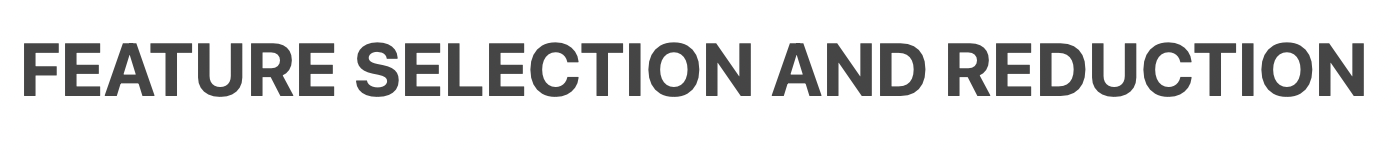

In [268]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')

In [269]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df.iloc[:, 3:454]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LassoCV
lasso = LassoCV(cv=5)

# Fit the model
lasso.fit(X_train_scaled, y_train)

# Predict on the training and test data
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)


# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = lasso.score(X_train_scaled, y_train)
test_r2 = lasso.score(X_test_scaled, y_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Best alpha : {lasso.alpha_}")
print(f"R-squared, Train: {train_r2}, Test: {test_r2}")
print(f"R-squared, Test: {test_r2}")
print(f"Mean Squared Error, Train: {train_mse}, Test: {test_mse}")
print(f"Root Mean Squared Error, Train: {train_rmse}, Test: {test_rmse}")
print(f"Mean Absolute Error, Train: {train_mae}, Test: {test_mae}")
print(f"Mean Absolute Percentage Error, Train: {train_mape}, Test: {test_mape}")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

    # Get the feature names
feature_names = X.columns

# Get the feature importances (the coefficients of the features in the Lasso model)
importances = lasso.coef_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")



# Select the top 15 positive features
positive_features = [(feature_names[i], importances[i]) for i in indices if importances[i] > 0][:15]

# Select the top 15 negative features
negative_features = [(feature_names[i], importances[i]) for i in indices if importances[i] < 0][-15:]

# Combine the positive and negative features
primary_features = positive_features + negative_features

# Get the primary feature column names
primary_columns = [feature for feature, importance in primary_features]

# Print the primary feature column names
print("\nPrimary feature column names:")
for column in primary_columns:
    print(column)


# Print the primary features
print("\nPrimary features:")
for feature, importance in primary_features:
    print(f"Feature: {feature}, Importance: {importance}")




Best alpha : 0.11812200529104229
R-squared, Train: 0.9684414365524685, Test: 0.886701843186282
R-squared, Test: 0.886701843186282
Mean Squared Error, Train: 8.802999382538106, Test: 24.59231810786819
Root Mean Squared Error, Train: 2.9669848975918476, Test: 4.95906423711855
Mean Absolute Error, Train: 2.3672876540191408, Test: 3.930481840232215
Mean Absolute Percentage Error, Train: 0.40856114716526787, Test: 1.7311396482483856
1. feature COMMUTING TO WORK - Worked from home (2.8099027938576686)
2. feature RACE - One race - Black or African American (2.789234859259264)
3. feature HISPANIC OR LATINO AND RACE - Mexican (1.9304953676396106)
4. feature EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree (1.5787870020734431)
5. feature ANCESTRY - Swiss (1.203714299251012)
6. feature Total households - Cohabiting couple household (1.1811210504828067)
7. feature SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - $600 to $799 (1.1574730

In [270]:
primary_features

[('COMMUTING TO WORK - Worked from home', 2.8099027938576686),
 ('RACE - One race - Black or African American', 2.789234859259264),
 ('HISPANIC OR LATINO AND RACE - Mexican', 1.9304953676396106),
 ('EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree',
  1.5787870020734431),
 ('ANCESTRY - Swiss', 1.203714299251012),
 ('Total households - Cohabiting couple household', 1.1811210504828067),
 ('SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - $600 to $799',
  1.1574730280959817),
 ('YEAR STRUCTURE BUILT - Built 1940 to 1949', 0.9999641955607221),
 ('Females 15 years and over - Never married', 0.9819647591006019),
 ('HOUSE HEATING FUEL - Wood', 0.9491405599580007),
 ('ANCESTRY - Swedish', 0.8176956527034669),
 ('ANCESTRY - French Canadian', 0.8145519962407044),
 ('HEALTH INSURANCE COVERAGE - Not in labor force: - With public coverage',
  0.5469085118844773),
 ('EMPLOYMENT STATUS - Females 16 years and over - In labor force',
  0.54

/var/folders/h4/j84n8y_50sq08cp7wghj5_xm0000gn/T/ipykernel_58021/4089479917.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


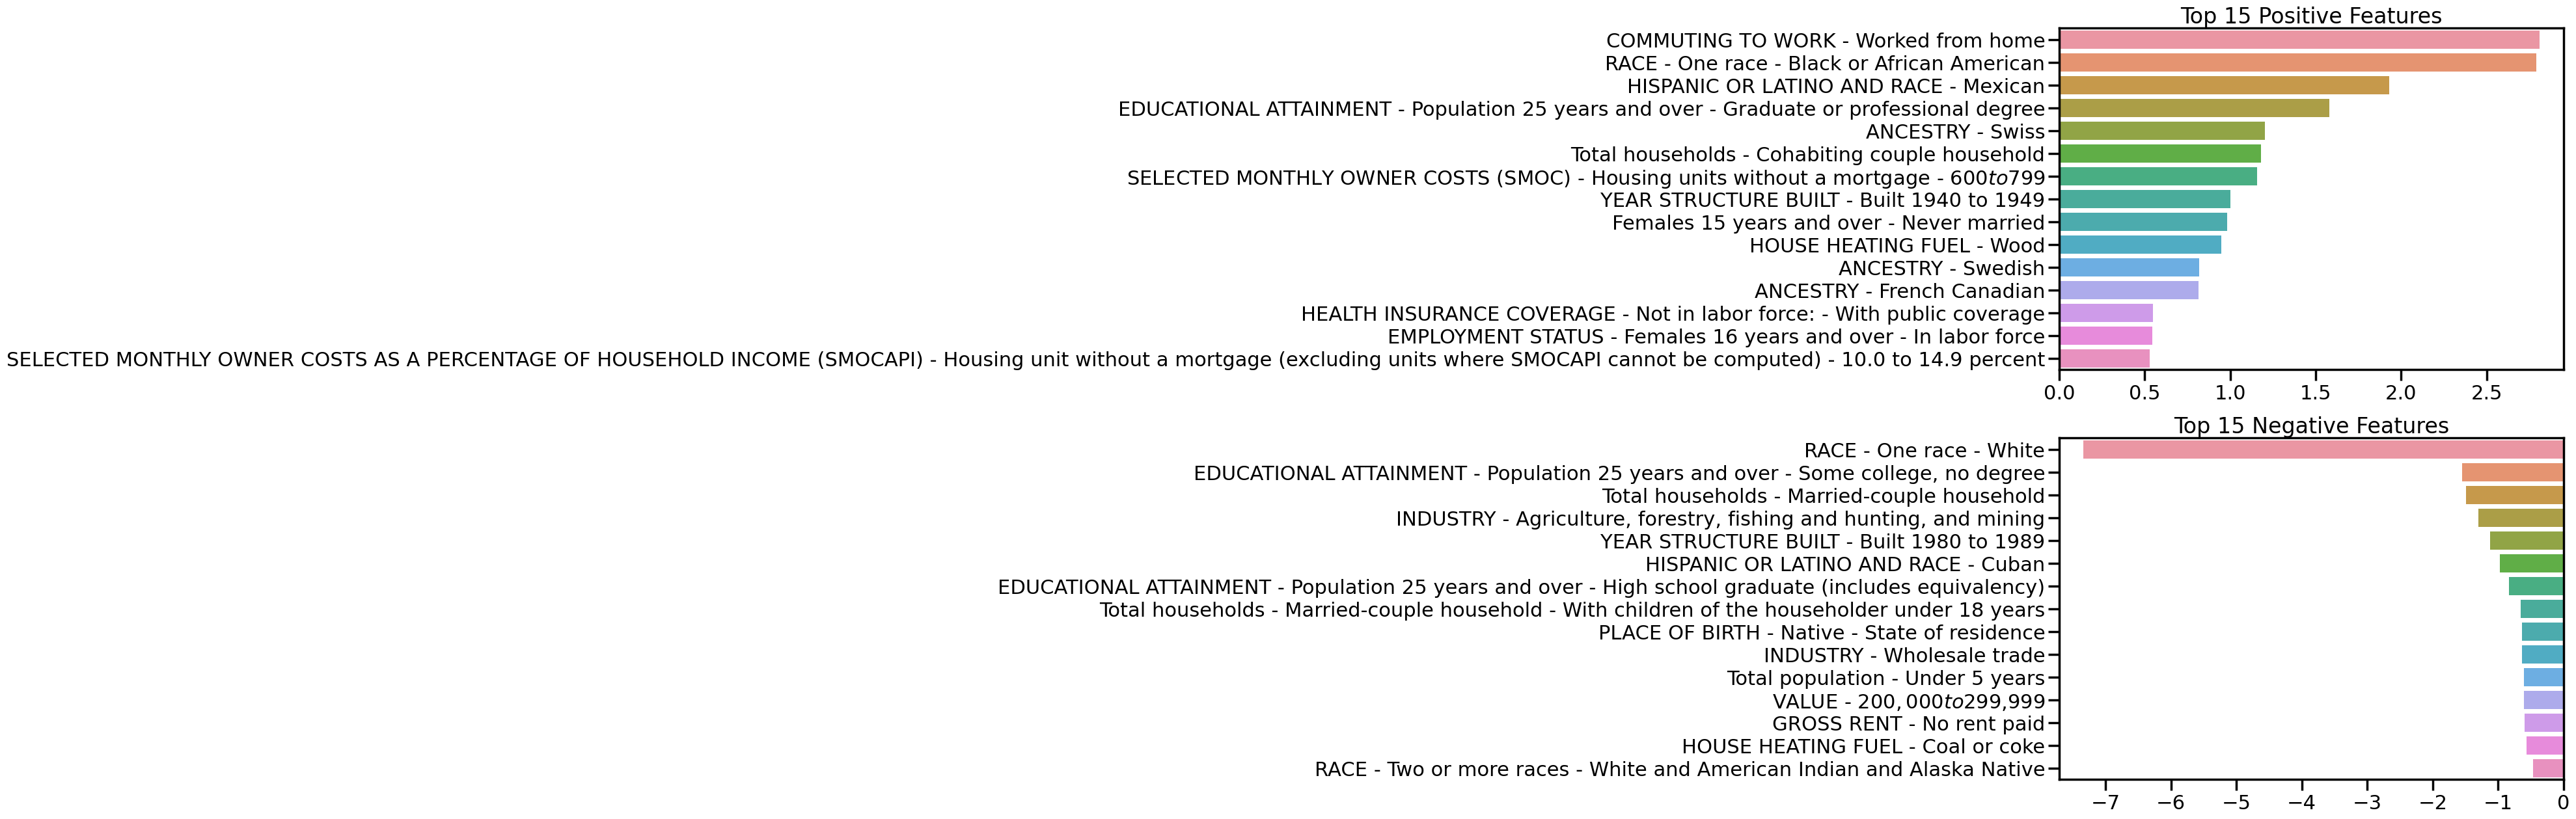

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context for "poster"
sns.set_context("poster")

# Sort the features by their absolute importance and take top 15 positive and negative
top_pos = sorted(positive_features, key=lambda x: x[1], reverse=True)[:15]
top_neg = sorted(negative_features, key=lambda x: abs(x[1]), reverse=True)[:15]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Create a bar plot for positive features
sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], ax=axs[0])
axs[0].set_title("Top 15 Positive Features")

# Create a bar plot for negative features
sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], ax=axs[1])
axs[1].set_title("Top 15 Negative Features")

# Show the plot
plt.tight_layout()
plt.show()


In [284]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')

In [285]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df.iloc[:, 3:454]
X = X.drop(columns=primary_columns)

# Split the data into training and test sets
X_train2, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train2)

# Transform the training and test data
X_train2_scaled = scaler.transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Initialize LassoCV
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the model
lasso.fit(X_train2_scaled, y_train)

# Get the feature names
feature_names = X.columns

# Get the feature importances (the coefficients of the features in the Lasso model)
importances = lasso.coef_

# Sort the features by importance
indices = np.argsort(importances)[::-1]


# Predict on the training and test data
y_train_pred = lasso.predict(X_train2_scaled)
y_test_pred = lasso.predict(X_test2_scaled)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = lasso.score(X_train2_scaled, y_train)
test_r2 = lasso.score(X_test2_scaled, y_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Best alpha : {lasso.alpha_}")
print(f"R-squared, Train: {train_r2}, Test: {test_r2}")
print(f"R-squared, Test: {test_r2}")
print(f"Mean Squared Error, Train: {train_mse}, Test: {test_mse}")
print(f"Root Mean Squared Error, Train: {train_rmse}, Test: {test_rmse}")
print(f"Mean Absolute Error, Train: {train_mae}, Test: {test_mae}")
print(f"Mean Absolute Percentage Error, Train: {train_mape}, Test: {test_mape}")

# Select the top 15 positive features
positive_features = [(feature_names[i], importances[i]) for i in indices if importances[i] > 0][:15]

# Select the top 15 negative features
negative_features = [(feature_names[i], importances[i]) for i in indices if importances[i] < 0][-15:]

# Combine the positive and negative features
secondary_features = positive_features + negative_features

# Get the primary feature column names
secondary_columns = [feature for feature, importance in secondary_features]

# Print the primary feature column names
print("\nSecondary feature column names:")
for column in secondary_columns:
    print(column)

# Print the secondary features
print("\nSecondary features:")
for feature, importance in secondary_features:
    print(f"Feature: {feature}, Importance: {importance}")
    
print("Feature ranking:")
for f in range(X_train2.shape[1]):
    print(f"{f + 1}. feature {X_train2.columns[indices[f]]} ({importances[indices[f]]})")


Best alpha : 0.056273961902724365
R-squared, Train: 0.97109072193225, Test: 0.8960894310190367
R-squared, Test: 0.8960894310190367
Mean Squared Error, Train: 8.064003211145291, Test: 22.554663191484735
Root Mean Squared Error, Train: 2.839718861286323, Test: 4.749175001143328
Mean Absolute Error, Train: 2.204063074019535, Test: 3.585800482424265
Mean Absolute Percentage Error, Train: 0.33873415312760863, Test: 1.866287332030524

Secondary feature column names:
EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor's degree or higher
Total households - Female householder, no spouse/partner present
INDUSTRY - Professional, scientific, and management, and administrative and waste management services
INCOME AND BENEFITS - Total households - With retirement income
Total population - 65 to 74 years
MORTGAGE STATUS - Housing units with a mortgage
RACE - One race - Some other race
LANGUAGE SPOKEN AT HOME - Spanish
Total population - 35 to 44 years
HOUSING TENURE - Moved in 1989 and e

In [278]:
secondary_features

[("EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor's degree or higher",
  5.080720110555275),
 ('Total households - Female householder, no spouse/partner present',
  4.051135432184544),
 ('INDUSTRY - Professional, scientific, and management, and administrative and waste management services',
  2.833223359275206),
 ('INCOME AND BENEFITS - Total households - With retirement income',
  2.8263522941261523),
 ('Total population - 65 to 74 years', 1.572262251800403),
 ('MORTGAGE STATUS - Housing units with a mortgage', 1.5541872932179934),
 ('RACE - One race - Some other race', 1.473611798607869),
 ('LANGUAGE SPOKEN AT HOME - Spanish', 1.4729577033567103),
 ('Total population - 35 to 44 years', 1.4258190132310629),
 ('HOUSING TENURE - Moved in 1989 and earlier', 1.3539884180938175),
 ('INDUSTRY - Manufacturing', 1.3440168325243462),
 ('Males 15 years and over - Never married', 1.2932813049348366),
 ('INDUSTRY - Construction', 1.2481298603545095),
 ('RACE - One race - Filipin

/var/folders/h4/j84n8y_50sq08cp7wghj5_xm0000gn/T/ipykernel_58021/2353647949.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


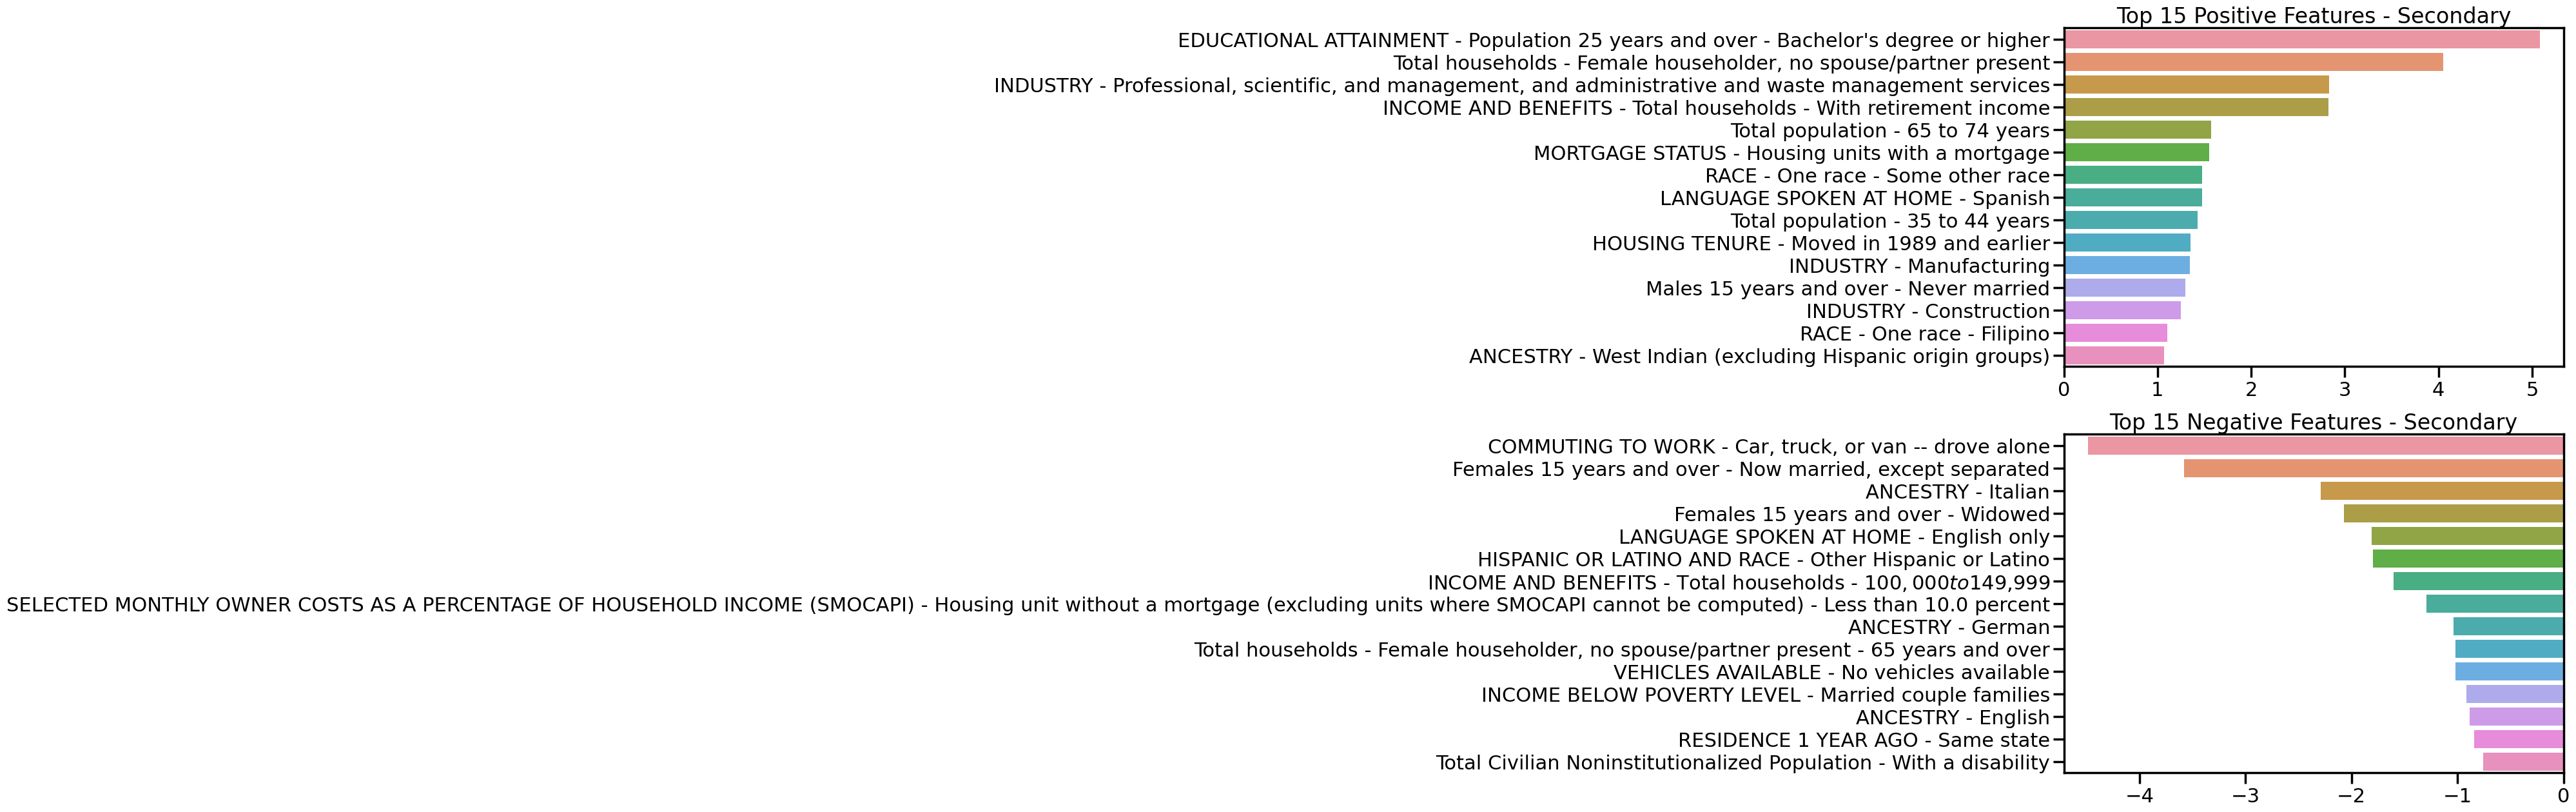

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context for "poster"
sns.set_context("poster")

# Sort the features by their absolute importance and take top 15 positive and negative
top_pos = sorted(positive_features, key=lambda x: x[1], reverse=True)[:15]
top_neg = sorted(negative_features, key=lambda x: abs(x[1]), reverse=True)[:15]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Create a bar plot for positive features
sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], ax=axs[0])
axs[0].set_title("Top 15 Positive Features - Secondary")

# Create a bar plot for negative features
sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], ax=axs[1])
axs[1].set_title("Top 15 Negative Features - Secondary")

# Show the plot
plt.tight_layout()
plt.show()


In [287]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')

In [289]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Combine primary and secondary column lists
primary_and_secondary_columns = primary_columns + secondary_columns


# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df.iloc[:, 3:454]
X = X.drop(columns=primary_and_secondary_columns)

# Split the data into training and test sets
X_train3, X_test3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train3)

# Transform the training and test data
X_train3_scaled = scaler.transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

# Initialize LassoCV
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the model
lasso.fit(X_train3_scaled, y_train)

# Get the feature names
feature_names = X.columns

# Get the feature importances (the coefficients of the features in the Lasso model)
importances = lasso.coef_

# Sort the features by importance
indices = np.argsort(importances)[::-1]


# Predict on the training and test data
y_train_pred = lasso.predict(X_train3_scaled)
y_test_pred = lasso.predict(X_test3_scaled)

# Compute metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = lasso.score(X_train3_scaled, y_train)
test_r2 = lasso.score(X_test3_scaled, y_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Best alpha : {lasso.alpha_}")
print(f"R-squared, Train: {train_r2}, Test: {test_r2}")
print(f"R-squared, Test: {test_r2}")
print(f"Mean Squared Error, Train: {train_mse}, Test: {test_mse}")
print(f"Root Mean Squared Error, Train: {train_rmse}, Test: {test_rmse}")
print(f"Mean Absolute Error, Train: {train_mae}, Test: {test_mae}")
print(f"Mean Absolute Percentage Error, Train: {train_mape}, Test: {test_mape}")

# Select the top 15 positive features
positive_features = [(feature_names[i], importances[i]) for i in indices if importances[i] > 0][:15]

# Select the top 15 negative features
negative_features = [(feature_names[i], importances[i]) for i in indices if importances[i] < 0][-15:]

# Combine the positive and negative features
tertiary_features = positive_features + negative_features

# Get the primary feature column names
tertiary_columns = [feature for feature, importance in tertiary_features]

# Print the primary feature column names
print("\ntertiary feature column names:")
for column in tertiary_columns:
    print(column)

# Print the tertiary features
print("\ntertiary features:")
for feature, importance in tertiary_features:
    print(f"Feature: {feature}, Importance: {importance}")
    
print("Feature ranking:")
for f in range(X_train3.shape[1]):
    print(f"{f + 1}. feature {X_train3.columns[indices[f]]} ({importances[indices[f]]})")


Best alpha : 0.26692054415580463
R-squared, Train: 0.9083174385575439, Test: 0.8372786562269109
R-squared, Test: 0.8372786562269109
Mean Squared Error, Train: 25.574089679629697, Test: 35.320036632079294
Root Mean Squared Error, Train: 5.057083119707417, Test: 5.943066265159702
Mean Absolute Error, Train: 3.963339361359849, Test: 4.6743461791620495
Mean Absolute Percentage Error, Train: 0.6698535072084575, Test: 2.126084199347037

tertiary feature column names:
LANGUAGE SPOKEN AT HOME - Language other than English
ANCESTRY - Subsaharan African
WORLD REGION OF BIRTH OF FOREIGN BORN - Northern America
VEHICLES AVAILABLE - 1 vehicle available
INCOME AND BENEFITS - Families - $200,000 or more
Total population - Female
INCOME AND BENEFITS - Total households - With Food Stamp/SNAP benefits in the past 12 months
INCOME AND BENEFITS - Median earnings for female full-time, year-round workers (dollars)
PLACE OF BIRTH - Native - Different state
YEAR STRUCTURE BUILT - Built 1950 to 1959
Total hous

/var/folders/h4/j84n8y_50sq08cp7wghj5_xm0000gn/T/ipykernel_58021/1840578476.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


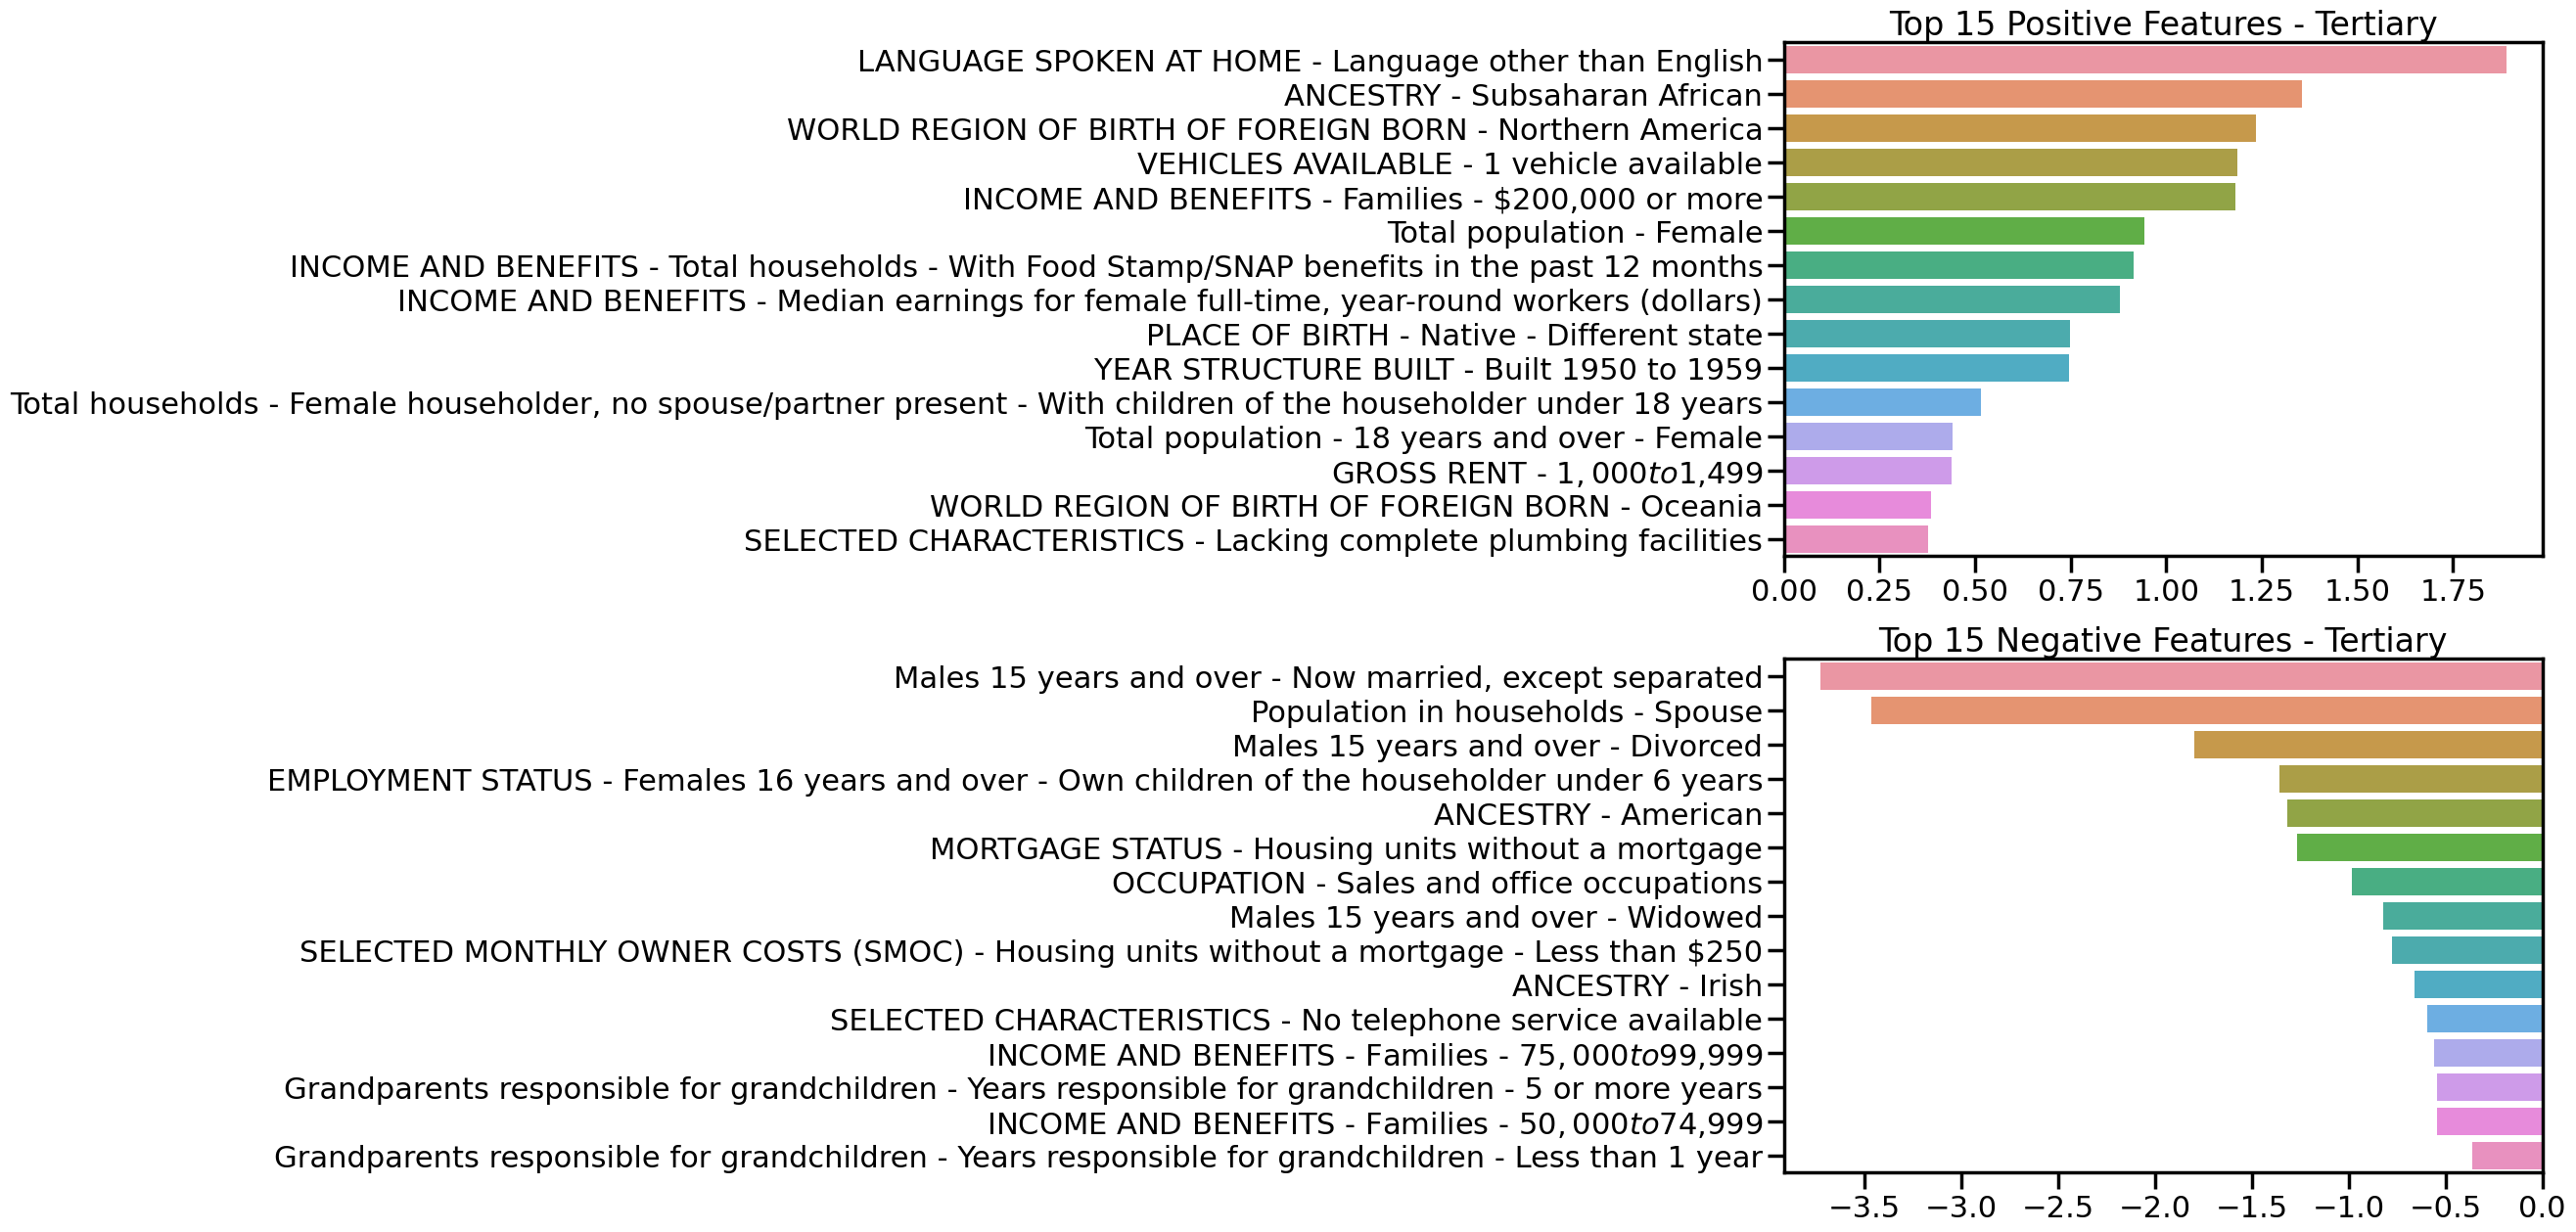

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context for "poster"
sns.set_context("poster")

# Sort the features by their absolute importance and take top 15 positive and negative
top_pos = sorted(positive_features, key=lambda x: x[1], reverse=True)[:15]
top_neg = sorted(negative_features, key=lambda x: abs(x[1]), reverse=True)[:15]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Create a bar plot for positive features
sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], ax=axs[0])
axs[0].set_title("Top 15 Positive Features - Tertiary")

# Create a bar plot for negative features
sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], ax=axs[1])
axs[1].set_title("Top 15 Negative Features - Tertiary")

# Show the plot
plt.tight_layout()
plt.show()


In [291]:
important_columns = primary_and_secondary_columns + tertiary_columns

In [292]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')
prf_df = pd.read_csv('data/Full_Dataset_PRF.csv')

In [294]:
# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df[primary_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessors (scalers)
classifiers = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'RidgeCV': {
        'model': RidgeCV(cv=5),
        'params': {}
    },
    'LassoCV': {
        'model': LassoCV(cv=5),
        'params': {
        'classifier__cv': [3, 5, 10]}
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__epsilon': [0.1, 0.2, 0.3]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'classifier__alpha': [0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    }
}


preprocessors = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'No Scaler': None
}

# Iterate over each preprocessor
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=42)

        # Fit the randomized search
        random_search.fit(X_train, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")
        

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.9369144316074033
R-squared: 0.850
Mean Squared Error: 32.518
Root Mean Squared Error: 5.702
Mean Absolute Error: 4.503
Mean Absolute Percentage Error: 1.641%

Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9368151254285013
R-squared: 0.852
Mean Squared Error: 32.159
Root Mean Squared Error: 5.671
Mean Absolute Error: 4.484
Mean Absolute Percentage Error: 1.638%

Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 10}
Best score: 0.9369779127861838
R-squared: 0.854
Mean Squared Error: 31.671
Root Mean Squared Error: 5.628
Mean Absolute Error: 4.451
Mean Absolute Percentage Error: 1.666%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.8694362384344929
R-squared: 0.826
Mean Squared Error: 37.758
Root Mean Squared Error: 6.145
Mean Absolute Error: 4.860
Mean Absolute Percentage Error: 2.060%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.8964389146755938
R-squared: 0.851
Mean Squared Error: 32.370
Root Mean Squared Error: 5.689
Mean Absolute Error: 4.447
Mean Absolute Percentage Error: 1.946%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.2, 'classifier__C': 10}
Best score: 0.8782126653973601
R-squared: 0.867
Mean Squared Error: 28.865
Root Mean Squared Error: 5.373
Mean Absolute Error: 4.222
Mean Absolute Percentage Error: 1.108%

Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.9353294813147117
R-squared: 0.863
Mean Squared Error: 29.788
Root Mean Squared Error: 5.458
Mean Absolute Error: 4.324
Mean Absolute Percentage Error: 1.704%

Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.6957566244259572
R-squared: 0.619
Mean Squared Error: 82.754
Root Mean Squared Error: 9.097
Mean Absolute Error: 7.326
Mean Absolute Percentage Error: 3.020%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 5}
Best score: 0.8520705532859868
R-squared: 0.825
Mean Squared Error: 3

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters


Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.8337036325091194
R-squared: 0.782
Mean Squared Error: 47.391
Root Mean Squared Error: 6.884
Mean Absolute Error: 5.389
Mean Absolute Percentage Error: 1.894%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.9012519953464946
R-squared: 0.865
Mean Squared Error: 29.402
Root Mean Squared Error: 5.422
Mean Absolute Error: 4.226
Mean Absolute Percentage Error: 1.864%

Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.9369144316074033
R-squared: 0.850
Mean Squared Error: 32.518
Root Mean Squared Error: 5.702
Mean Absolute Error: 4.503
Mean Absolute Percentage Error: 1.641%

Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9377244814762408
R-squared: 0.854
Mean Squared Error: 31.692
Root Mean Squared Error: 5.630
Mean Absolute Error: 4.454
Mean Absolute Percentage Error: 1.670%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 10}
Best score: 0.9369637265702467
R-squared: 0.853
Mean Squared Error: 31.894
Root Mean Squared Error: 5.647
Mean Absolute Error: 4.462
Mean Absolute Percentage Error: 1.707%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.8695288439890279
R-squared: 0.826
Mean Squared Error: 37.669
Root Mean Squared Error: 6.137
Mean Absolute Error: 4.964
Mean Absolute Percentage Error: 2.118%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.897068200329332
R-squared: 0.850
Mean Squared Error: 32.509
Root Mean Squared Error: 5.702
Mean Absolute Error: 4.435
Mean Absolute Percentage Error: 1.935%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.9191795384434404
R-squared: 0.893
Mean Squared Error: 23.271
Root Mean Squared Error: 4.824
Mean Absolute Error: 3.821
Mean Absolute Percentage Error: 1.348%

Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.8921561578807722
R-squared: 0.831
Mean Squared Error: 36.785
Root Mean Squared Error: 6.065
Mean Absolute Error: 4.792
Mean Absolute Percentage Error: 2.362%

Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.7016538834646487
R-squared: 0.621
Mean Squared Error: 82.236
Root Mean Squared Error: 9.068
Mean Absolute Error: 7.324
Mean Absolute Percentage Error: 3.022%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.8606211533149046
R-squared: 0.839
Mean Squared Error: 34.88

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters


Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.8382853662171609
R-squared: 0.763
Mean Squared Error: 51.409
Root Mean Squared Error: 7.170
Mean Absolute Error: 5.680
Mean Absolute Percentage Error: 1.895%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.9000353449181523
R-squared: 0.856
Mean Squared Error: 31.216
Root Mean Squared Error: 5.587
Mean Absolute Error: 4.442
Mean Absolute Percentage Error: 1.894%

No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.9369144316074038
R-squared: 0.850
Mean Squared Error: 32.518
Root Mean Squared Error: 5.702
Mean Absolute Error: 4.503
Mean Absolute Percentage Error: 1.641%

No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9367548347710294
R-squared: 0.850
Mean Squared Error: 32.499
Root Mean Squared Error: 5.701
Mean Absolute Error: 4.496
Mean Absolute Percentage Error: 1.645%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.8050036937220642
R-squared: 0.743
Mean Squared Error: 55.814
Root Mean Squared Error: 7.471
Mean Absolute Error: 6.278
Mean Absolute Percentage Error: 2.390%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.8697747429273169
R-squared: 0.834
Mean Squared Error: 35.945
Root Mean Squared Error: 5.995
Mean Absolute Error: 4.757
Mean Absolute Percentage Error: 1.948%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.8962069592345971
R-squared: 0.853
Mean Squared Error: 31.969
Root Mean Squared Error: 5.654
Mean Absolute Error: 4.383
Mean Absolute Percentage Error: 1.914%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.1959870897908072
R-squared: 0.180
Mean Squared Error: 178.053
Root Mean Squared Error: 13.344
Mean Absolute Error: 10.554
Mean Absolute Percentage Error: 2.557%

No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.1, 'classifier__alpha': 0.1}
Best score: 0.9358922748724389
R-squared: 0.852
Mean Squared Error: 32.097
Root Mean Squared Error: 5.665
Mean Absolute Error: 4.423
Mean Absolute Percentage Error: 1.661%

No Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.7079166965933407
R-squared: 0.625
Mean Squared Error: 81.320
Root Mean Squared Error: 9.018
Mean Absolute Error: 7.217
Mean Absolute Percentage Error: 3.014%

No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 3}
Best score: 0.22017886470296927
R-squared: 0.319
Mean Squared Error: 147.924
Root Mean Squ

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters


No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.8351451983650705
R-squared: 0.766
Mean Squared Error: 50.768
Root Mean Squared Error: 7.125
Mean Absolute Error: 5.575
Mean Absolute Percentage Error: 1.922%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.903259930146542
R-squared: 0.863
Mean Squared Error: 29.653
Root Mean Squared Error: 5.445
Mean Absolute Error: 4.288
Mean Absolute Percentage Error: 1.806%


In [295]:

from sklearn.preprocessing import StandardScaler
# Define target variable
y = pct_df['PVI_2023']

# Define feature variables
X = pct_df[important_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


# Define the model
model = XGBRegressor()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"\nMetrics for XGBoostRegressor with grid search:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"R-squared: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Absolute Percentage Error: {mape:.3f}%")



Metrics for XGBoostRegressor with grid search:
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.8984993837787979
R-squared: 0.848
Mean Squared Error: 33.009
Root Mean Squared Error: 5.745
Mean Absolute Error: 4.646
Mean Absolute Percentage Error: 220.295%


In [307]:
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the L2 regularization rate
reg_rate = 10

# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(reg_rate)))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=32, callbacks=[EarlyStopping(patience=100)])

# Evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train)
test_mse = model.evaluate(X_test_scaled, y_test)


# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Compute R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Print the metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R^2:', train_r2)
print('Test R^2:', test_r2)


Epoch 1/500
11/11 [==============================] - 0s 5ms/step - loss: 2517.1526 - val_loss: 2228.6729
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 2120.8401 - val_loss: 1868.0851
Epoch 3/500
11/11 [==============================] - 0s 1ms/step - loss: 1786.0221 - val_loss: 1563.4417
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 1504.5844 - val_loss: 1309.4825
Epoch 5/500
11/11 [==============================] - 0s 1ms/step - loss: 1272.1482 - val_loss: 1099.5476
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 1079.0593 - val_loss: 926.5128
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 918.8016 - val_loss: 782.5543
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 785.0608 - val_loss: 661.0303
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 667.7559 - val_loss: 553.5405
Epoch 10/500
11/11 [==============================] - 0s 2ms/s

11/11 [==============================] - 0s 1ms/step - loss: 73.4803 - val_loss: 66.4345
Epoch 81/500
11/11 [==============================] - 0s 1ms/step - loss: 73.4983 - val_loss: 63.9944
Epoch 82/500
11/11 [==============================] - 0s 1ms/step - loss: 74.5510 - val_loss: 62.7083
Epoch 83/500
11/11 [==============================] - 0s 1ms/step - loss: 74.9807 - val_loss: 63.6916
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 77.4062 - val_loss: 62.7216
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 78.1020 - val_loss: 64.3662
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 72.1993 - val_loss: 63.3105
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 75.6114 - val_loss: 64.2049
Epoch 88/500
11/11 [==============================] - 0s 1ms/step - loss: 72.5318 - val_loss: 61.5413
Epoch 89/500
11/11 [==============================] - 0s 1ms/step - loss: 73.9185 - val_loss: 6

Epoch 160/500
11/11 [==============================] - 0s 1ms/step - loss: 64.5214 - val_loss: 61.3471
Epoch 161/500
11/11 [==============================] - 0s 1ms/step - loss: 65.1851 - val_loss: 55.5210
Epoch 162/500
11/11 [==============================] - 0s 1ms/step - loss: 67.8838 - val_loss: 57.0317
Epoch 163/500
11/11 [==============================] - 0s 1ms/step - loss: 66.5494 - val_loss: 57.0795
Epoch 164/500
11/11 [==============================] - 0s 1ms/step - loss: 67.3892 - val_loss: 58.9052
Epoch 165/500
11/11 [==============================] - 0s 1ms/step - loss: 64.7102 - val_loss: 57.8245
Epoch 166/500
11/11 [==============================] - 0s 1ms/step - loss: 66.4770 - val_loss: 55.6288
Epoch 167/500
11/11 [==============================] - 0s 1ms/step - loss: 66.9661 - val_loss: 67.0344
Epoch 168/500
11/11 [==============================] - 0s 1ms/step - loss: 67.4145 - val_loss: 57.0595
Epoch 169/500
11/11 [==============================] - 0s 1ms/step - loss

11/11 [==============================] - 0s 1ms/step - loss: 67.1176 - val_loss: 57.3901
Epoch 240/500
11/11 [==============================] - 0s 1ms/step - loss: 65.1978 - val_loss: 63.5304
Epoch 241/500
11/11 [==============================] - 0s 1ms/step - loss: 66.3206 - val_loss: 54.9262
Epoch 242/500
11/11 [==============================] - 0s 1ms/step - loss: 65.5311 - val_loss: 55.2487
Epoch 243/500
11/11 [==============================] - 0s 1ms/step - loss: 62.2916 - val_loss: 55.5422
Epoch 244/500
11/11 [==============================] - 0s 1ms/step - loss: 66.8025 - val_loss: 54.6800
Epoch 245/500
11/11 [==============================] - 0s 1ms/step - loss: 60.3545 - val_loss: 57.4400
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 65.5701 - val_loss: 56.1964
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 64.6210 - val_loss: 56.1820
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 64.2642 - va

11/11 [==============================] - 0s 1ms/step - loss: 61.4660 - val_loss: 51.9080
Epoch 319/500
11/11 [==============================] - 0s 1ms/step - loss: 62.2436 - val_loss: 52.0717
Epoch 320/500
11/11 [==============================] - 0s 1ms/step - loss: 58.9629 - val_loss: 53.1118
Epoch 321/500
11/11 [==============================] - 0s 1ms/step - loss: 65.7001 - val_loss: 51.4757
Epoch 322/500
11/11 [==============================] - 0s 1ms/step - loss: 63.3064 - val_loss: 54.2327
Epoch 323/500
11/11 [==============================] - 0s 1ms/step - loss: 57.1144 - val_loss: 55.2031
Epoch 324/500
11/11 [==============================] - 0s 1ms/step - loss: 66.1547 - val_loss: 52.7575
Epoch 325/500
11/11 [==============================] - 0s 1ms/step - loss: 59.9677 - val_loss: 53.3413
Epoch 326/500
11/11 [==============================] - 0s 1ms/step - loss: 62.5308 - val_loss: 51.5507
Epoch 327/500
11/11 [==============================] - 0s 1ms/step - loss: 63.0344 - va

11/11 [==============================] - 0s 1ms/step - loss: 62.2685 - val_loss: 55.4789
Epoch 398/500
11/11 [==============================] - 0s 1ms/step - loss: 60.9378 - val_loss: 52.0173
Epoch 399/500
11/11 [==============================] - 0s 1ms/step - loss: 57.9443 - val_loss: 52.6591
Epoch 400/500
11/11 [==============================] - 0s 1ms/step - loss: 56.2706 - val_loss: 49.3389
Epoch 401/500
11/11 [==============================] - 0s 1ms/step - loss: 60.8747 - val_loss: 54.1627
Epoch 402/500
11/11 [==============================] - 0s 1ms/step - loss: 64.6130 - val_loss: 54.9855
Epoch 403/500
11/11 [==============================] - 0s 1ms/step - loss: 58.5637 - val_loss: 52.0126
Epoch 404/500
11/11 [==============================] - 0s 1ms/step - loss: 58.6058 - val_loss: 54.8972
Epoch 405/500
11/11 [==============================] - 0s 1ms/step - loss: 62.8208 - val_loss: 51.9531
Epoch 406/500
11/11 [==============================] - 0s 1ms/step - loss: 61.5183 - va

11/11 [==============================] - 0s 1ms/step - loss: 59.4607 - val_loss: 50.6941
Epoch 477/500
11/11 [==============================] - 0s 1ms/step - loss: 58.9767 - val_loss: 52.4357
Epoch 478/500
11/11 [==============================] - 0s 1ms/step - loss: 56.4481 - val_loss: 51.2808
Epoch 479/500
11/11 [==============================] - 0s 2ms/step - loss: 58.5492 - val_loss: 51.9360
Epoch 480/500
11/11 [==============================] - 0s 2ms/step - loss: 59.6200 - val_loss: 51.0561
Epoch 481/500
11/11 [==============================] - 0s 1ms/step - loss: 55.8087 - val_loss: 50.5360
Epoch 482/500
11/11 [==============================] - 0s 1ms/step - loss: 61.9090 - val_loss: 50.9277
Epoch 483/500
11/11 [==============================] - 0s 1ms/step - loss: 56.1488 - val_loss: 50.1988
Epoch 484/500
11/11 [==============================] - 0s 1ms/step - loss: 59.7116 - val_loss: 49.0148
Epoch 485/500
11/11 [==============================] - 0s 1ms/step - loss: 56.5977 - va

# Best Feature Subset Selection - gave up takes way too long

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import numpy as np
from tqdm import tqdm

# Get the number of features p
p = X.shape[1]

# Define the feature sizes to consider
feature_sizes = [30]  # For example, if you want to consider models with 30 features

# Initialize an empty dictionary to store the results
results = {}

# Loop over the feature sizes
for k in tqdm(feature_sizes, desc='Feature sizes'):
    # Initialize an empty list to store the MSEs for each model of size k
    mse_list = []
    
    # Loop over all combinations of p features taken k at a time
    for combo in combinations(range(p), k):
        # Select the features
        X_subset = X.iloc[:, list(combo)]
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        
        # Fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Compute the MSE and add it to the list
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    # Store the MSEs in the dictionary
    results[k] = mse_list

# Compute the average MSE for each feature size
avg_mse = {k: np.mean(v) for k, v in results.items()}

# Find the feature size with the smallest average MSE
best_k = min(avg_mse, key=avg_mse.get)

print(f"The best feature size is {best_k} with an average MSE of {avg_mse[best_k]}")


Feature sizes:   0%|                                      | 0/1 [02:55<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import numpy as np
from tqdm import tqdm

# Get the number of features p
p = X.shape[1]

# Define the feature sizes to consider
feature_sizes = [30]  # For example, if you want to consider models with 30 features

# Initialize an empty dictionary to store the results
results = {}

# Loop over the feature sizes
for k in tqdm(feature_sizes, desc='Feature sizes'):
    # Initialize an empty list to store the MSEs for each model of size k
    mse_list = []
    
    # Loop over all combinations of p features taken k at a time
    for combo in combinations(range(p), k):
        # Select the features
        X_subset = X.iloc[:, list(combo)]
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        
        # Fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Compute the MSE and add it to the list
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    
    # Store the MSEs in the dictionary
    results[k] = mse_list

# Compute the average MSE for each feature size
avg_mse = {k: np.mean(v) for k, v in results.items()}

# Find the feature size with the smallest average MSE
best_k = min(avg_mse, key=avg_mse.get)

print(f"The best feature size is {best_k} with an average MSE of {avg_mse[best_k]}")


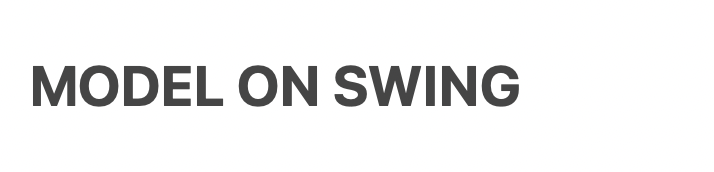

In [333]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')
pct_df = pct_df[pct_df["Swing from 2020 presidential"].abs() <= 22] #ran unopposed
pct_df["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"].str.rstrip('%').astype('float')
# Define target variable
y = pct_df['Swing from 2020 presidential']

# Define feature variables
X = pct_df[important_columns]  # Make a copy to avoid SettingWithCopyWarning
X["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"]

X['PVI_2023'] = pct_df['PVI_2023']   # just in case we wanna use it

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/var/folders/h4/j84n8y_50sq08cp7wghj5_xm0000gn/T/ipykernel_58021/4201723823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"]
/var/folders/h4/j84n8y_50sq08cp7wghj5_xm0000gn/T/ipykernel_58021/4201723823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PVI_2023'] = pct_df['PVI_2023']   # just in case we wanna use it


In [334]:
X.shape

(400, 92)

,COMMUTING TO WORK - Worked from home,RACE - One race - Black or African American,HISPANIC OR LATINO AND RACE - Mexican,EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree,ANCESTRY - Swiss,Total households - Cohabiting couple household,SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - $600 to $799,YEAR STRUCTURE BUILT - Built 1940 to 1949,Females 15 years and over - Never married,HOUSE HEATING FUEL - Wood,...,ANCESTRY - Irish,SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - Less than $250,Males 15 years and over - Widowed,OCCUPATION - Sales and office occupations,MORTGAGE STATUS - Housing units without a mortgage,ANCESTRY - American,EMPLOYMENT STATUS - Females 16 years and over - Own children of the householder under 6 years,Males 15 years and over - Divorced,Population in households - Spouse,"Males 15 years and over - Now married, except separated"
0,10.3,3.0,3.0,11.9,0.4,8.5,22.7,1.4,29.0,4.1,...,9.3,10.9,2.1,18.4,39.0,3.1,55651.0,10.7,18.3,47.8
2,6.2,31.1,2.6,9.5,0.1,4.7,6.0,2.6,30.1,0.4,...,7.2,21.2,3.9,22.0,46.7,15.6,46002.0,11.0,17.3,47.1
3,7.7,24.5,1.6,9.7,0.1,4.5,7.1,4.1,29.5,1.5,...,9.6,21.2,3.5,20.6,49.4,12.4,43142.0,12.6,18.4,47.1
4,5.2,6.8,5.2,7.2,0.1,4.7,7.7,4.4,23.4,1.1,...,9.1,23.3,3.0,19.4,55.0,17.6,53015.0,11.5,19.7,53.2
5,14.8,16.7,2.8,14.6,0.1,4.7,14.0,2.3,26.1,0.6,...,9.1,15.6,3.0,18.1,42.0,10.1,42613.0,11.1,20.8,53.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,16.7,1.8,3.6,12.7,0.7,6.7,31.4,2.9,24.8,1.2,...,11.1,1.9,2.4,19.1,34.1,2.8,42858.0,8.3,23.4,58.2
430,12.6,0.7,1.5,8.3,1.0,8.6,19.3,5.5,22.1,7.1,...,9.1,8.0,3.2,19.3,42.8,3.9,42509.0,11.8,22.2,53.5
432,8.5,3.4,0.4,8.5,0.1,5.6,8.2,7.4,24.4,4.8,...,11.4,25.8,3.9,21.2,58.8,10.4,47798.0,13.0,19.6,52.1
433,11.6,2.3,0.8,11.4,0.3,7.1,7.6,5.5,26.2,5.4,...,14.0,26.3,3.3,19.6,48.8,8.6,51073.0,11.8,20.1,49.6


In [335]:
# Define the preprocessors (scalers)
classifiers = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'RidgeCV': {
        'model': RidgeCV(cv=5),
        'params': {}
    },
    'LassoCV': {
        'model': LassoCV(cv=5, max_iter=10000),
        'params': {
        'classifier__cv': [3, 5, 10]}
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__epsilon': [0.1, 0.2, 0.3]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'classifier__alpha': [0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    }
}


preprocessors = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'No Scaler': None
}

# Iterate over each preprocessor
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=42)

        # Fit the randomized search
        random_search.fit(X_train, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")
        

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: -0.3133785758031425
R-squared: 0.248
Mean Squared Error: 30.101
Root Mean Squared Error: 5.486
Mean Absolute Error: 3.825
Mean Absolute Percentage Error: 90343534938780.531%

Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.055071155242489754
R-squared: 0.277
Mean Squared Error: 28.947
Root Mean Squared Error: 5.380
Mean Absolute Error: 3.695
Mean Absolute Percentage Error: 71653002795913.688%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.07418319022706414
R-squared: 0.231
Mean Squared Error: 30.790
Root Mean Squared Error: 5.549
Mean Absolute Error: 3.793
Mean Absolute Percentage Error: 139564674741463.969%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.17199360978024658
R-squared: 0.256
Mean Squared Error: 29.761
Root Mean Squared Error: 5.455
Mean Absolute Error: 3.679
Mean Absolute Percentage Error: 173107110677055.469%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Best score: 0.14232611175269605
R-squared: 0.249
Mean Squared Error: 30.039
Root Mean Squared Error: 5.481
Mean Absolute Error: 3.590
Mean Absolute Percentage Error: 113617455505048.906%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.15264429545527308
R-squared: 0.248
Mean Squared Error: 30.085
Root Mean Squared Error: 5.485
Mean Absolute Error: 3.735
Mean Absolute Percentage Error: 103153195717965.953%

Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.1, 'classifier__alpha': 1}
Best score: 0.132106497806222
R-squared: 0.216
Mean Squared Error: 31.369
Root Mean Squared Error: 5.601
Mean Absolute Error: 3.854
Mean Absolute Percentage Error: 171030868452193.594%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: -0.19306628783853372
R-squared: -0.220
Mean Squared Error: 48.825
Root Mean Squared Error: 6.988
Mean Absolute Error: 4.870
Mean Absolute Percentage Error: 289825401019740.938%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.07400885064458951
R-squared: 0.200
Mean Squared Error: 32.038
Root Mean Squared Error: 5.660
Mean Absolute Error: 3.894
Mean Absolute Percentage Error: 149583844766236.656%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}
Best score: 0.11223103773792198
R-squared: 0.187
Mean Squared Error: 32.554
Root Mean Squared Error: 5.706
Mean Absolute Error: 3.964
Mean Absolute Percentage Error: 159392104458898.594%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10}
Best score: 0.16900796352177233
R-squared: 0.276
Mean Squared Error: 28.969
Root Mean Squared Error: 5.382
Mean Absolute Error: 3.667
Mean Absolute Percentage Error: 135051086848668.250%

Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: -0.3345427703324825
R-squared: 0.250
Mean Squared Error: 30.033
Root Mean Squared Error: 5.480
Mean Absolute Error: 3.824
Mean Absolute Percentage Error: 84442493013198.531%

Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.09942867017136992
R-squared: 0.294
Mean Squared Error: 28.258
Root Mean Squared Error: 5.316
Mean Absolute Error: 3.669
Mean Absolute Percentage Error: 92932321726236.031%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.11001454920926354
R-squared: 0.178
Mean Squared Error: 32.884
Root Mean Squared Error: 5.734
Mean Absolute Error: 3.898
Mean Absolute Percentage Error: 169238573730200.844%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.16760702779174902
R-squared: 0.254
Mean Squared Error: 29.850
Root Mean Squared Error: 5.464
Mean Absolute Error: 3.661
Mean Absolute Percentage Error: 132425127904400.500%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Best score: 0.13655418405444597
R-squared: 0.233
Mean Squared Error: 30.699
Root Mean Squared Error: 5.541
Mean Absolute Error: 3.699
Mean Absolute Percentage Error: 112215512994857.609%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.17989649419139117
R-squared: 0.264
Mean Squared Error: 29.437
Root Mean Squared Error: 5.426
Mean Absolute Error: 3.667
Mean Absolute Percentage Error: 127484260296251.906%

Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.1, 'classifier__alpha': 0.1}
Best score: 0.10374782275757632
R-squared: 0.148
Mean Squared Error: 34.086
Root Mean Squared Error: 5.838
Mean Absolute Error: 4.019
Mean Absolute Percentage Error: 220580003436180.750%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: -0.2266540639399927
R-squared: -0.315
Mean Squared Error: 52.645
Root Mean Squared Error: 7.256
Mean Absolute Error: 4.947
Mean Absolute Percentage Error: 289825401019740.938%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.06457075184453784
R-squared: 0.232
Mean Squared Error: 30.755
Root Mean Squared Error: 5.546
Mean Absolute Error: 3.874
Mean Absolute Percentage Error: 149583844766236.938%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 50, 'classifier__learning_rate': 0.01}
Best score: 0.1051759977247841
R-squared: 0.207
Mean Squared Error: 31.723
Root Mean Squared Error: 5.632
Mean Absolute Error: 3.908
Mean Absolute Percentage Error: 177690907085499.750%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.16495216040759805
R-squared: 0.274
Mean Squared Error: 29.057
Root Mean Squared Error: 5.390
Mean Absolute Error: 3.655
Mean Absolute Percentage Error: 135268925575116.469%

No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: -0.31482948488330587
R-squared: 0.250
Mean Squared Error: 30.011
Root Mean Squared Error: 5.478
Mean Absolute Error: 3.823
Mean Absolute Percentage Error: 83417287604434.906%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: -0.20308631546457848
R-squared: 0.288
Mean Squared Error: 28.502
Root Mean Squared Error: 5.339
Mean Absolute Error: 3.705
Mean Absolute Percentage Error: 46532732784233.352%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.11564835880638151
R-squared: 0.040
Mean Squared Error: 38.432
Root Mean Squared Error: 6.199
Mean Absolute Error: 4.220
Mean Absolute Percentage Error: 242061680656823.406%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.1600074276660717
R-squared: 0.261
Mean Squared Error: 29.564
Root Mean Squared Error: 5.437
Mean Absolute Error: 3.617
Mean Absolute Percentage Error: 149110938368613.062%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Best score: 0.13625343124516914
R-squared: 0.228
Mean Squared Error: 30.889
Root Mean Squared Error: 5.558
Mean Absolute Error: 3.715
Mean Absolute Percentage Error: 114451436419362.203%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 1}
Best score: -0.007025404517505551
R-squared: -0.039
Mean Squared Error: 41.588
Root Mean Squared Error: 6.449
Mean Absolute Error: 4.708
Mean Absolute Percentage Error: 282441257491072.625%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.218e+03, tolerance: 9.396e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+03, 


No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.1, 'classifier__alpha': 10}
Best score: 0.16937879855302504
R-squared: 0.203
Mean Squared Error: 31.879
Root Mean Squared Error: 5.646
Mean Absolute Error: 3.927
Mean Absolute Percentage Error: 160441271344412.438%

No Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: -0.20307442480209503
R-squared: -0.313
Mean Squared Error: 52.568
Root Mean Squared Error: 7.250
Mean Absolute Error: 4.966
Mean Absolute Percentage Error: 289825401019741.125%

No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: -0.18101577829523657
R-squared: -0.123
Mean Squared Error: 44.932
Root Mean Squared Error: 6.703
Mean Absolute Error: 4.805
Mean Absolute Percentage Error: 475290603531424.375%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.01}
Best score: 0.10971008351590157
R-squared: 0.189
Mean Squared Error: 32.445
Root Mean Squared Error: 5.696
Mean Absolute Error: 3.948
Mean Absolute Percentage Error: 186238732524424.219%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.1572493461047278
R-squared: 0.255
Mean Squared Error: 29.801
Root Mean Squared Error: 5.459
Mean Absolute Error: 3.715
Mean Absolute Percentage Error: 152052782419098.719%


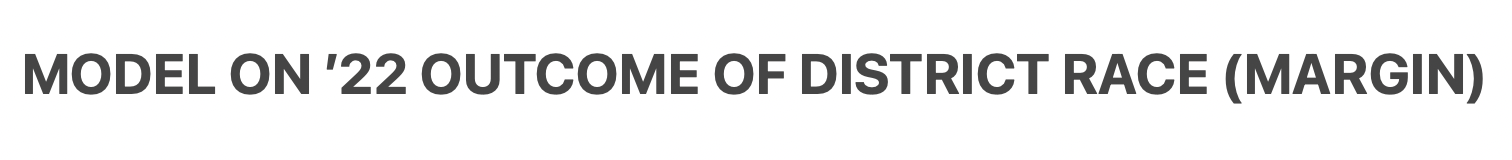

In [338]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')
pct_df = pct_df[pct_df["Swing from 2020 presidential"].abs() <= 22] #ran unopposed
pct_df["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"].str.rstrip('%').astype('float')
# Define target variable
y = pct_df['2022 Margin']

# Define feature variables
X = pct_df.iloc[:,3:454].copy()  # Make a copy to avoid SettingWithCopyWarning
X["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"]

X['PVI_2023'] = pct_df['PVI_2023']   # just in case we wanna use it

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [339]:
# Define the preprocessors (scalers)
classifiers = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'RidgeCV': {
        'model': RidgeCV(cv=5),
        'params': {}
    },
    'LassoCV': {
        'model': LassoCV(cv=5, max_iter=10000),
        'params': {
        'classifier__cv': [3, 5, 10]}
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__epsilon': [0.1, 0.2, 0.3]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'classifier__alpha': [0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    }
}


preprocessors = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'No Scaler': None
}

# Iterate over each preprocessor
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=42)

        # Fit the randomized search
        random_search.fit(X_train, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")
        

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.7650434714616241
R-squared: 0.558
Mean Squared Error: 424.188
Root Mean Squared Error: 20.596
Mean Absolute Error: 14.583
Mean Absolute Percentage Error: 1.784%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.8009076839166305
R-squared: 0.904
Mean Squared Error: 91.759
Root Mean Squared Error: 9.579
Mean Absolute Error: 7.355
Mean Absolute Percentage Error: 0.749%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 10}
Best score: 0.9727276022881469
R-squared: 0.967
Mean Squared Error: 31.853
Root Mean Squared Error: 5.644
Mean Absolute Error: 3.917
Mean Absolute Percentage Error: 0.340%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.9569412057991558
R-squared: 0.955
Mean Squared Error: 43.228
Root Mean Squared Error: 6.575
Mean Absolute Error: 4.722
Mean Absolute Percentage Error: 0.529%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.9593788260443409
R-squared: 0.968
Mean Squared Error: 30.253
Root Mean Squared Error: 5.500
Mean Absolute Error: 4.042
Mean Absolute Percentage Error: 0.366%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.7644645251866757
R-squared: 0.781
Mean Squared Error: 210.628
Root Mean Squared Error: 14.513
Mean Absolute Error: 10.263
Mean Absolute Percentage Error: 1.103%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.700e+03, tolerance: 2.790e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.563e+03, 


Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.9526869979458061
R-squared: 0.963
Mean Squared Error: 35.533
Root Mean Squared Error: 5.961
Mean Absolute Error: 4.168
Mean Absolute Percentage Error: 0.370%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.9181965432993143
R-squared: 0.901
Mean Squared Error: 94.730
Root Mean Squared Error: 9.733
Mean Absolute Error: 6.524
Mean Absolute Percentage Error: 0.805%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 5}
Best score: 0.7350591938166804
R-squared: 0.653
Mean Squared Error: 332.820
Root Mean Squared Error: 18.243
Mean Absolute Error: 13.247
Mean Absolute Percentage Error: 1.260%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.9484472037992913
R-squared: 0.952
Mean Squared Error: 45.927
Root Mean Squared Error: 6.777
Mean Absolute Error: 5.130
Mean Absolute Percentage Error: 0.513%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10}
Best score: 0.9604180648250038
R-squared: 0.956
Mean Squared Error: 42.419
Root Mean Squared Error: 6.513
Mean Absolute Error: 4.825
Mean Absolute Percentage Error: 0.518%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.6075237126327868
R-squared: 0.563
Mean Squared Error: 419.958
Root Mean Squared Error: 20.493
Mean Absolute Error: 14.854
Mean Absolute Percentage Error: 1.831%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.8957774114878069
R-squared: 0.920
Mean Squared Error: 76.809
Root Mean Squared Error: 8.764
Mean Absolute Error: 6.523
Mean Absolute Percentage Error: 0.628%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.9709892980235793
R-squared: 0.967
Mean Squared Error: 31.876
Root Mean Squared Error: 5.646
Mean Absolute Error: 3.913
Mean Absolute Percentage Error: 0.384%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.9574362192336421
R-squared: 0.954
Mean Squared Error: 44.046
Root Mean Squared Error: 6.637
Mean Absolute Error: 4.885
Mean Absolute Percentage Error: 0.598%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.9596911534037844
R-squared: 0.969
Mean Squared Error: 29.851
Root Mean Squared Error: 5.464
Mean Absolute Error: 4.027
Mean Absolute Percentage Error: 0.365%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.3, 'classifier__C': 10}
Best score: 0.8156873177808153
R-squared: 0.830
Mean Squared Error: 162.878
Root Mean Squared Error: 12.762
Mean Absolute Error: 9.510
Mean Absolute Percentage Error: 1.175%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.9173792344219981
R-squared: 0.926
Mean Squared Error: 70.816
Root Mean Squared Error: 8.415
Mean Absolute Error: 6.361
Mean Absolute Percentage Error: 0.671%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.9147656119157641
R-squared: 0.923
Mean Squared Error: 73.656
Root Mean Squared Error: 8.582
Mean Absolute Error: 6.136
Mean Absolute Percentage Error: 0.825%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.7312303475091493
R-squared: 0.671
Mean Squared Error: 315.561
Root Mean Squared Error: 17.764
Mean Absolute Error: 12.863
Mean Absolute Percentage Error: 1.417%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.9477650637229962
R-squared: 0.950
Mean Squared Error: 48.034
Root Mean Squared Error: 6.931
Mean Absolute Error: 5.223
Mean Absolute Percentage Error: 0.518%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.9620776781449113
R-squared: 0.953
Mean Squared Error: 44.856
Root Mean Squared Error: 6.697
Mean Absolute Error: 4.943
Mean Absolute Percentage Error: 0.530%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.796482853418364
R-squared: 0.579
Mean Squared Error: 404.433
Root Mean Squared Error: 20.111
Mean Absolute Error: 15.635
Mean Absolute Percentage Error: 1.923%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.8870971456426069
R-squared: 0.927
Mean Squared Error: 70.287
Root Mean Squared Error: 8.384
Mean Absolute Error: 6.674
Mean Absolute Percentage Error: 0.821%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.7458009433708843
R-squared: 0.657
Mean Squared Error: 329.229
Root Mean Squared Error: 18.145
Mean Absolute Error: 14.335
Mean Absolute Percentage Error: 1.550%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.9565909532548937
R-squared: 0.955
Mean Squared Error: 43.687
Root Mean Squared Error: 6.610
Mean Absolute Error: 4.827
Mean Absolute Percentage Error: 0.562%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.9600758645469483
R-squared: 0.969
Mean Squared Error: 30.107
Root Mean Squared Error: 5.487
Mean Absolute Error: 4.010
Mean Absolute Percentage Error: 0.370%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.2, 'classifier__C': 10}
Best score: 0.27495551782841626
R-squared: 0.305
Mean Squared Error: 667.262
Root Mean Squared Error: 25.831
Mean Absolute Error: 20.570
Mean Absolute Percentage Error: 1.564%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.577e+02, tolerance: 2.790e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.790e+02, 

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.772e+03, tolerance: 2.763e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.880e+03, tolerance: 2.775e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the nu

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.174e+03, tolerance: 2.872e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.886e+03, tolerance: 3.464e+01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iteratio


No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 1}
Best score: 0.9696248684657311
R-squared: 0.970
Mean Squared Error: 29.124
Root Mean Squared Error: 5.397
Mean Absolute Error: 3.721
Mean Absolute Percentage Error: 0.378%

No Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.9103168866739351
R-squared: 0.929
Mean Squared Error: 67.751
Root Mean Squared Error: 8.231
Mean Absolute Error: 5.855
Mean Absolute Percentage Error: 0.754%

No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.5510820854007823
R-squared: 0.420
Mean Squared Error: 556.564
Root Mean Squared Error: 23.592
Mean Absolute Error: 17.266
Mean Absolute Percentage Error: 1.939%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.9479623836672209
R-squared: 0.953
Mean Squared Error: 45.476
Root Mean Squared Error: 6.744
Mean Absolute Error: 5.047
Mean Absolute Percentage Error: 0.516%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10}
Best score: 0.9610578458427982
R-squared: 0.955
Mean Squared Error: 43.671
Root Mean Squared Error: 6.608
Mean Absolute Error: 4.819
Mean Absolute Percentage Error: 0.520%


In [351]:
pct_df = pd.read_csv('data/Full_Dataset_PCT.csv')
pct_df = pct_df[pct_df["Swing from 2020 presidential"].abs() <= 22] #ran unopposed
pct_df["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"].str.rstrip('%').astype('float')
# Define target variable
y = pct_df['2022 Margin']

# Define feature variables
X = pct_df[primary_columns].copy()  # Make a copy to avoid SettingWithCopyWarning
X["Percent of 2020 turnout"] = pct_df["Percent of 2020 turnout"]

X['PVI_2023'] = pct_df['PVI_2023']   # just in case we wanna use it

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [352]:
# Define the preprocessors (scalers)
classifiers = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'RidgeCV': {
        'model': RidgeCV(cv=5),
        'params': {}
    },
    'LassoCV': {
        'model': LassoCV(cv=5, max_iter=10000),
        'params': {
        'classifier__cv': [3, 5, 10]}
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__epsilon': [0.1, 0.2, 0.3]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'classifier__alpha': [0.1, 1, 10],
            'classifier__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    }
}


preprocessors = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'No Scaler': None
}

# Iterate over each preprocessor
for preprocessor_name, preprocessor in preprocessors.items():
    
    # If there's a preprocessor, add it to the pipeline
    if preprocessor is not None:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', None)])
    else:
        pipeline = Pipeline(steps=[('classifier', None)])
    
    # Iterate over each classifier
    for classifier_name, classifier in classifiers.items():
        pipeline.set_params(classifier = classifier['model'])

        # Initialize the randomized search
        random_search = RandomizedSearchCV(pipeline, classifier['params'], n_iter=10, cv=5, random_state=10)

        # Fit the randomized search
        random_search.fit(X_train, y_train)

        # Use the best estimator to make predictions on the test set
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n{preprocessor_name} with {classifier_name} metrics:")
        print(f"Best parameters: {random_search.best_params_}")
        print(f"Best score: {random_search.best_score_}")
        print(f"R-squared: {r2:.3f}")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"Root Mean Squared Error: {rmse:.3f}")
        print(f"Mean Absolute Error: {mae:.3f}")
        print(f"Mean Absolute Percentage Error: {mape:.3f}%")
        

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.9719805553470101
R-squared: 0.966
Mean Squared Error: 32.660
Root Mean Squared Error: 5.715
Mean Absolute Error: 4.136
Mean Absolute Percentage Error: 0.454%

Standard Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9724321684811044
R-squared: 0.965
Mean Squared Error: 33.323
Root Mean Squared Error: 5.773
Mean Absolute Error: 4.117
Mean Absolute Percentage Error: 0.445%

Standard Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 10}
Best score: 0.9725979327717054
R-squared: 0.967
Mean Squared Error: 31.997
Root Mean Squared Error: 5.657
Mean Absolute Error: 4.051
Mean Absolute Percentage Error: 0.489%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10}
Best score: 0.9608038033599925
R-squared: 0.958
Mean Squared Error: 40.207
Root Mean Squared Error: 6.341
Mean Absolute Error: 4.674
Mean Absolute Percentage Error: 0.651%

Standard Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.9617949408391444
R-squared: 0.964
Mean Squared Error: 34.994
Root Mean Squared Error: 5.916
Mean Absolute Error: 4.017
Mean Absolute Percentage Error: 0.428%

Standard Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.842180144348131
R-squared: 0.852
Mean Squared Error: 142.340
Root Mean Squared Error: 11.931
Mean Absolute Error: 8.751
Mean Absolute Percentage Error: 0.832%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.9715669717197917
R-squared: 0.963
Mean Squared Error: 35.138
Root Mean Squared Error: 5.928
Mean Absolute Error: 4.189
Mean Absolute Percentage Error: 0.458%

Standard Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.9336367784695045
R-squared: 0.930
Mean Squared Error: 67.500
Root Mean Squared Error: 8.216
Mean Absolute Error: 5.848
Mean Absolute Percentage Error: 0.792%

Standard Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 7}
Best score: 0.8383901255171878
R-squared: 0.815
Mean Squared Error: 177.538
Root Mean Squared Error: 13.324
Mean Absolute Error: 9.743
Mean Absolute Percentage Error: 1.004%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.9511816449527941
R-squared: 0.952
Mean Squared Error: 45.843
Root Mean Squared Error: 6.771
Mean Absolute Error: 5.155
Mean Absolute Percentage Error: 0.538%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Standard Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10}
Best score: 0.9662807295204996
R-squared: 0.961
Mean Squared Error: 37.388
Root Mean Squared Error: 6.115
Mean Absolute Error: 4.364
Mean Absolute Percentage Error: 0.575%

Min Max Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.9719805553470099
R-squared: 0.966
Mean Squared Error: 32.660
Root Mean Squared Error: 5.715
Mean Absolute Error: 4.136
Mean Absolute Percentage Error: 0.454%

Min Max Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9718418882775357
R-squared: 0.964
Mean Squared Error: 34.462
Root Mean Squared Error: 5.870
Mean Absolute Error: 4.159
Mean Absolute Percentage Error: 0.442%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.972812043118297
R-squared: 0.965
Mean Squared Error: 33.161
Root Mean Squared Error: 5.759
Mean Absolute Error: 4.107
Mean Absolute Percentage Error: 0.497%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.9603679669696105
R-squared: 0.957
Mean Squared Error: 41.236
Root Mean Squared Error: 6.422
Mean Absolute Error: 4.659
Mean Absolute Percentage Error: 0.636%

Min Max Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.961359539338765
R-squared: 0.963
Mean Squared Error: 35.169
Root Mean Squared Error: 5.930
Mean Absolute Error: 3.990
Mean Absolute Percentage Error: 0.428%

Min Max Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.9125887304407364
R-squared: 0.913
Mean Squared Error: 83.544
Root Mean Squared Error: 9.140
Mean Absolute Error: 7.046
Mean Absolute Percentage Error: 0.772%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.9, 'classifier__alpha': 0.1}
Best score: 0.9323021724121379
R-squared: 0.933
Mean Squared Error: 63.863
Root Mean Squared Error: 7.991
Mean Absolute Error: 6.189
Mean Absolute Percentage Error: 0.633%

Min Max Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.9340385268198368
R-squared: 0.930
Mean Squared Error: 67.219
Root Mean Squared Error: 8.199
Mean Absolute Error: 5.878
Mean Absolute Percentage Error: 0.790%

Min Max Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 5}
Best score: 0.859289158153669
R-squared: 0.839
Mean Squared Error: 154.239
Root Mean Squared Error: 12.419
Mean Absolute Error: 9.693
Mean Absolute Percentage Error: 1.280%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.9513729310281309
R-squared: 0.952
Mean Squared Error: 46.006
Root Mean Squared Error: 6.783
Mean Absolute Error: 5.127
Mean Absolute Percentage Error: 0.509%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Min Max Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': None}
Best score: 0.9660874388176364
R-squared: 0.960
Mean Squared Error: 38.216
Root Mean Squared Error: 6.182
Mean Absolute Error: 4.330
Mean Absolute Percentage Error: 0.578%

No Scaler with LinearRegression metrics:
Best parameters: {}
Best score: 0.9719805553470071
R-squared: 0.966
Mean Squared Error: 32.660
Root Mean Squared Error: 5.715
Mean Absolute Error: 4.136
Mean Absolute Percentage Error: 0.454%

No Scaler with RidgeCV metrics:
Best parameters: {}
Best score: 0.9723083724055958
R-squared: 0.966
Mean Squared Error: 32.563
Root Mean Squared Error: 5.706
Mean Absolute Error: 4.106
Mean Absolute Percentage Error: 0.443%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with LassoCV metrics:
Best parameters: {'classifier__cv': 3}
Best score: 0.9585266178190507
R-squared: 0.949
Mean Squared Error: 48.838
Root Mean Squared Error: 6.988
Mean Absolute Error: 5.309
Mean Absolute Percentage Error: 0.509%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with RandomForestRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': None}
Best score: 0.9601293649482197
R-squared: 0.957
Mean Squared Error: 41.035
Root Mean Squared Error: 6.406
Mean Absolute Error: 4.728
Mean Absolute Percentage Error: 0.628%

No Scaler with GradientBoostingRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best score: 0.9616510441828467
R-squared: 0.963
Mean Squared Error: 35.306
Root Mean Squared Error: 5.942
Mean Absolute Error: 4.008
Mean Absolute Percentage Error: 0.429%

No Scaler with SVR metrics:
Best parameters: {'classifier__epsilon': 0.1, 'classifier__C': 10}
Best score: 0.22970191595664885
R-squared: 0.112
Mean Squared Error: 852.686
Root Mean Squared Error: 29.201
Mean Absolute Error: 21.673
Mean Absolute Percentage Error: 1.790%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ElasticNet metrics:
Best parameters: {'classifier__l1_ratio': 0.1, 'classifier__alpha': 1}
Best score: 0.9730652931428352
R-squared: 0.964
Mean Squared Error: 34.788
Root Mean Squared Error: 5.898
Mean Absolute Error: 4.221
Mean Absolute Percentage Error: 0.435%

No Scaler with DecisionTreeRegressor metrics:
Best parameters: {'classifier__max_depth': 5}
Best score: 0.9321016396560969
R-squared: 0.930
Mean Squared Error: 67.219
Root Mean Squared Error: 8.199
Mean Absolute Error: 5.878
Mean Absolute Percentage Error: 0.790%

No Scaler with KNeighborsRegressor metrics:
Best parameters: {'classifier__n_neighbors': 3}
Best score: 0.3198217645221305
R-squared: 0.372
Mean Squared Error: 603.540
Root Mean Squared Error: 24.567
Mean Absolute Error: 18.742
Mean Absolute Percentage Error: 1.950%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with AdaBoostRegressor metrics:
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1}
Best score: 0.9512624058379158
R-squared: 0.951
Mean Squared Error: 46.809
Root Mean Squared Error: 6.842
Mean Absolute Error: 5.138
Mean Absolute Percentage Error: 0.518%


/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



No Scaler with ExtraTreesRegressor metrics:
Best parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10}
Best score: 0.9656594070593799
R-squared: 0.960
Mean Squared Error: 38.363
Root Mean Squared Error: 6.194
Mean Absolute Error: 4.382
Mean Absolute Percentage Error: 0.556%


In [353]:
primary_columns

['COMMUTING TO WORK - Worked from home',
 'RACE - One race - Black or African American',
 'HISPANIC OR LATINO AND RACE - Mexican',
 'EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree',
 'ANCESTRY - Swiss',
 'Total households - Cohabiting couple household',
 'SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - $600 to $799',
 'YEAR STRUCTURE BUILT - Built 1940 to 1949',
 'Females 15 years and over - Never married',
 'HOUSE HEATING FUEL - Wood',
 'ANCESTRY - Swedish',
 'ANCESTRY - French Canadian',
 'HEALTH INSURANCE COVERAGE - Not in labor force: - With public coverage',
 'EMPLOYMENT STATUS - Females 16 years and over - In labor force',
 'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI) - Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed) - 10.0 to 14.9 percent',
 'RACE - Two or more races - White and American Indian and Alaska Native',
 'HOUSE HEATING FUEL - Coal or coke

In [31]:
pct_df['PVI_2023']

0      -8.02
1     -16.47
2     -17.32
3     -19.36
4     -33.24
       ...  
430   -12.27
431   -10.16
432   -23.23
433   -21.52
434   -25.27
Name: PVI_2023, Length: 435, dtype: float64

In [34]:
import statsmodels.api as sm

# Add a constant (intercept term) to the features
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit an OLS model
ols_model = sm.OLS(y_train, X_train_sm)

# Fit the data
results = ols_model.fit()

# Get the R-squared score on the test set
y_pred_ols = results.predict(X_test_sm)
r2_ols = r2_score(y_test, y_pred_ols)

r2_ols


-0.23080517221248487

In [35]:
results.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/Caskroom/miniforge/base/envs/WheeleyDope/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PVI_2023   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 01 Aug 2023   Prob (F-statistic):                nan
Time:                        13:12:37   Log-Likelihood:                 6644.4
No. Observations:                 348   AIC:                        -1.259e+04
Df Residuals:                       0   BIC:                        -1.125e+04
Df Model:                         347                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================================================================================================================
                                                                                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                                                       -0.0010        inf         -0        nan         nan         nan
CITIZEN, VOTING AGE POPULATION - Female                                                                                                                                                     -1.0816        inf         -0        nan         nan         nan
CITIZEN, VOTING AGE POPULATION - Male                                                                                                                                                        0.9853        inf          0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Cuban                                                                                                                                                         -0.4001        inf         -0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Hispanic or Latino (of any race)                                                                                                                              -0.7214        inf         -0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Mexican                                                                                                                                                        0.3151        inf          0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Other Hispanic or Latino                                                                                                                                      -0.3944        inf         -0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Puerto Rican                                                                                                                                                   0.4834        inf          0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Two or more races                                                                                                                                             -0.4489        inf         -0        nan         nan         nan
HISPANIC OR LATINO AND RACE - Two races excludi

# Lasso Regression

In [42]:
# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted to the training data
X_test_scaled = scaler.transform(X_test)

# Initialize a LassoCV model
lasso_model_scaled = LassoCV(cv=5)

# Fit the model on the scaled training data
lasso_model_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lasso_scaled = lasso_model_scaled.predict(X_test_scaled)

# Compute the R-squared score of the model
r2_lasso_scaled = r2_score(y_test, y_pred_lasso_scaled)

# Map the features to their coefficients (importances) in the scaled model
feature_importances_scaled = pd.DataFrame({"Feature": X.columns, "Importance": lasso_model_scaled.coef_})

# Sort the DataFrame by importance
feature_importances_scaled = feature_importances_scaled.sort_values("Importance", ascending=False)

r2_lasso_scaled, feature_importances_scaled


(0.886692988725742,
                                                Feature  Importance
 328               COMMUTING TO WORK - Worked from home    2.808939
 14         RACE - One race - Black or African American    2.787851
 4                HISPANIC OR LATINO AND RACE - Mexican    1.930350
 219  EDUCATIONAL ATTAINMENT - Population 25 years a...    1.579492
 208                                   ANCESTRY - Swiss    1.203753
 ..                                                 ...         ...
 180          YEAR STRUCTURE BUILT - Built 1980 to 1989   -1.121456
 431  INDUSTRY - Agriculture, forestry, fishing and ...   -1.300950
 307        Total households - Married-couple household   -1.497089
 223  EDUCATIONAL ATTAINMENT - Population 25 years a...   -1.550342
 27                             RACE - One race - White   -7.345753
 
 [450 rows x 2 columns])

In [40]:
# Map the features to their coefficients (importances)
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": lasso.coef_})

# Sort by most to least important
feature_importances = feature_importances.sort_values("Importance", ascending=False)

# display the DataFrame
feature_importances

,Feature,Importance
364,HEALTH INSURANCE COVERAGE - Unemployed:,0.000432
383,INCOME AND BENEFITS - Median earnings for fema...,0.000407
226,Females 15 years and over,0.000324
400,INCOME AND BENEFITS - Total households - Media...,0.000234
387,INCOME AND BENEFITS - Nonfamily households,0.000205
...,...,...
294,Total Civilian Noninstitutionalized Population...,-0.000054
309,VETERAN STATUS - Civilian population 18 years ...,-0.000096
338,EMPLOYMENT STATUS - Females 16 years and over ...,-0.000153
369,INCOME AND BENEFITS - Families,-0.000349


In [41]:
feature_importances.value_counts()

Feature                                                                                 Importance
ANCESTRY - American                                                                     0.0           1
SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units with a mortgage - $2,500 to $2,999  0.0           1
RACE - One race - White                                                                 0.0           1
RACE - One race - Vietnamese                                                            0.0           1
RACE - One race - Some other race                                                       0.0           1
                                                                                                     ..
HOUSE HEATING FUEL - Wood                                                               0.0           1
HOUSE HEATING FUEL - Utility gas                                                        0.0           1
HOUSE HEATING FUEL - Solar energy                                    

In [47]:
# Count the number of coefficients that were shrunk to zero
num_zero_coefs = (lasso_model_scaled.coef_ == 0).sum()

num_zero_coefs

357

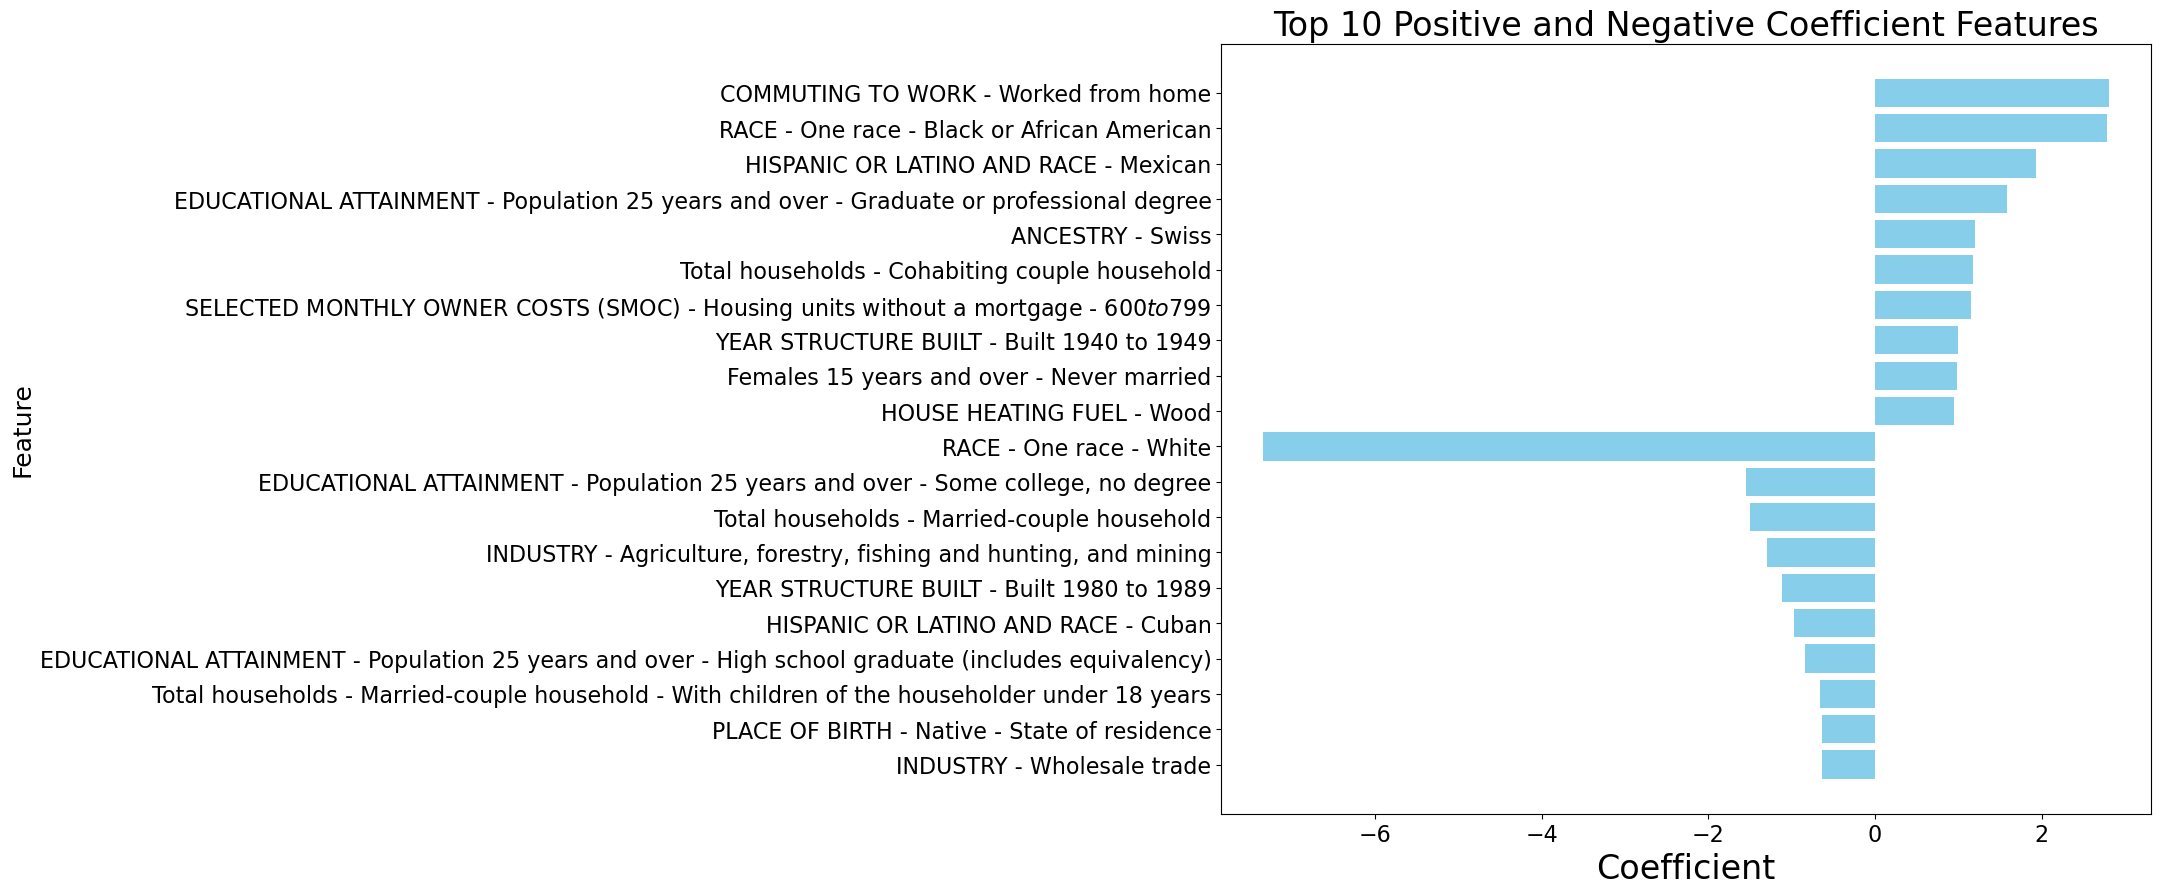

In [56]:
import matplotlib.pyplot as plt

# Create a DataFrame of non-zero coefficients
non_zero_coefs = feature_importances_scaled[feature_importances_scaled["Importance"] != 0]

# Get the top 10 positive and top 10 negative coefficient features
top_pos = non_zero_coefs.sort_values("Importance", ascending=False).head(10)
top_neg = non_zero_coefs.sort_values("Importance").head(10)

# Combine the top positive and negative features
top_features = pd.concat([top_pos, top_neg])

# Create a bar plot of the feature importances
plt.figure(figsize=(12, 10))
plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue')
plt.xlabel("Coefficient", fontsize=24)
plt.ylabel("Feature", fontsize=18)
plt.title("Top 10 Positive and Negative Coefficient Features", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()
plt.show()




In [52]:
# Print the list of all non-zero features
non_zero_features = non_zero_coefs["Feature"].tolist()
non_zero_features

['COMMUTING TO WORK - Worked from home',
 'RACE - One race - Black or African American',
 'HISPANIC OR LATINO AND RACE - Mexican',
 'EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree',
 'ANCESTRY - Swiss',
 'Total households - Cohabiting couple household',
 'SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - $600 to $799',
 'YEAR STRUCTURE BUILT - Built 1940 to 1949',
 'Females 15 years and over - Never married',
 'HOUSE HEATING FUEL - Wood',
 'ANCESTRY - Swedish',
 'ANCESTRY - French Canadian',
 'HEALTH INSURANCE COVERAGE - Not in labor force: - With public coverage',
 'EMPLOYMENT STATUS - Females 16 years and over - In labor force',
 'SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI) - Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed) - 10.0 to 14.9 percent',
 'INDUSTRY - Professional, scientific, and management, and administrative and waste management services',
 'WO

In [58]:
# Scaling the feature set again
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Using the non-zero features from the Lasso regression to build a new OLS model
X_lasso = X_scaled[non_zero_features]

# Resetting the index of y
y_reset = y.reset_index(drop=True)


X_lasso = sm.add_constant(X_lasso)
ols_lasso = sm.OLS(y_reset, X_lasso)

ols_lasso_results = ols_lasso.fit()
ols_lasso_results.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PVI_2023   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     108.2
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          1.95e-207
Time:                        13:51:31   Log-Likelihood:                -1094.5
No. Observations:                 435   AIC:                             2373.
Df Residuals:                     343   BIC:                             2748.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================================================================================================================
                                                                                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                                                        0.3917      0.162      2.422      0.016       0.074       0.710
COMMUTING TO WORK - Worked from home                                                                                                                                                         3.2933      0.673      4.891      0.000       1.969       4.618
RACE - One race - Black or African American                                                                                                                                                  3.9907      0.762      5.236      0.000       2.492       5.490
HISPANIC OR LATINO AND RACE - Mexican                                                                                                                                                        3.0108      0.607      4.957      0.000       1.816       4.206
EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree                                                                                                      0.2987      0.822      0.363      0.717      -1.319       1.916
ANCESTRY - Swiss                                                                                                                                                                             1.1929      0.253      4.711      0.000       0.695       1.691
Total households - Cohabiting couple household                                                                                                                                               1.6832      0.398      4.229      0.000       0.900       2.466
SELECTED MONTHLY OWNER COSTS (SMOC) - Housing units without a mortgage - $600 to $799                                                                                                        1.3416      0.346      3.876      0.000       0.661       2.022
YEAR STRUCTURE BUILT - Built 1940 to 1949                                                                                                                                                    0.2928      0.410      0.715      0.475      -0.513       1.099
Females 15 years and over - Never married      

In [59]:
# Convert non-zero features and their coefficients to a DataFrame
non_zero_df = pd.DataFrame({'Feature': non_zero_features, 'Coefficient': lasso_model_scaled.coef_[lasso_model_scaled.coef_ != 0]})
non_zero_df

,Feature,Coefficient
0,COMMUTING TO WORK - Worked from home,-0.978585
1,RACE - One race - Black or African American,1.930350
2,HISPANIC OR LATINO AND RACE - Mexican,2.787851
3,EDUCATIONAL ATTAINMENT - Population 25 years a...,-0.198294
4,ANCESTRY - Swiss,-0.079044
...,...,...
88,YEAR STRUCTURE BUILT - Built 1980 to 1989,0.387618
89,"INDUSTRY - Agriculture, forestry, fishing and ...",0.208112
90,Total households - Married-couple household,-1.300950
91,EDUCATIONAL ATTAINMENT - Population 25 years a...,0.515483


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate the metrics for the Lasso model
mse = mean_squared_error(y_test, y_pred_lasso_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lasso_scaled)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso_scaled)

mse, rmse, mae, mape


(24.59424004302052, 4.95925801335447, 3.930716579821291, 173.11809417987055)

In [61]:
# Get the average of the non-zero coefficient features in their non-scaled form
avg_non_zero_features = X[non_zero_features].mean()
avg_non_zero_features


COMMUTING TO WORK - Worked from home                                                       17.384598
RACE - One race - Black or African American                                                12.043678
HISPANIC OR LATINO AND RACE - Mexican                                                      11.215632
EDUCATIONAL ATTAINMENT - Population 25 years and over - Graduate or professional degree    13.639080
ANCESTRY - Swiss                                                                            0.254483
                                                                                             ...    
YEAR STRUCTURE BUILT - Built 1980 to 1989                                                  13.079540
INDUSTRY - Agriculture, forestry, fishing and hunting, and mining                           1.630115
Total households - Married-couple household                                                47.571494
EDUCATIONAL ATTAINMENT - Population 25 years and over - Some college, no degree            

In [14]:
# Set 'Formatted_District' as the index
prf_df.set_index('Formatted_District', inplace=True)

# Define target variable
target = prf_df['PVI_2023']

# Define feature variables
features = prf_df.iloc[:, 3:454]
features = features.drop('Representative', axis=1) #congressperson name

# Let's display the first few rows of the features and target
features.head(), target.head()


(                    CITIZEN, VOTING AGE POPULATION - Female  \
 Formatted_District                                            
 AK-AL                                              252485.0   
 AL-01                                              289663.0   
 AL-02                                              284652.0   
 AL-03                                              289423.0   
 AL-04                                              280884.0   
 
                     CITIZEN, VOTING AGE POPULATION - Male  \
 Formatted_District                                          
 AK-AL                                            281367.0   
 AL-01                                            265460.0   
 AL-02                                            254358.0   
 AL-03                                            269129.0   
 AL-04                                            260374.0   
 
                     HISPANIC OR LATINO AND RACE - Cuban  \
 Formatted_District                                   

In [15]:
# Rename target and features to y and X
y = target
X = features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Compute the R-squared score of the model
r2 = r2_score(y_test, y_pred)
r2

-0.8848183663154758

In [ ]:
import statsmodels.api as sm

# Add a constant (intercept term) to the features
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit an OLS model
ols_model = sm.OLS(y_train, X_train_sm)

# Fit the data
results = ols_model.fit()

# Get the R-squared score on the test set
y_pred_ols = results.predict(X_test_sm)
r2_ols = r2_score(y_test, y_pred_ols)

r2_ols
